# QMD class testing
## for the QLE algorithm learning a 2 qubit Hamiltonian

A. Gentile

In [1]:
%matplotlib inline
import qinfer as qi
import qutip as qt
import numpy as np
import scipy as sp
import math as mth
from IPython.display import display, Math, Latex
from functools import partial
import matplotlib.pyplot as plt

In [2]:
import datetime
import os as os
import time as time

In [3]:
import importlib as imp

In [4]:
import logging as logging
import warnings as warnings
import sys

%run LoggingCode.py

Importing Local Function for QML

In [5]:
# Add personalized library to PYTHONPATH
sys.path.append(os.path.join("..","Libraries","QML_lib"))

In [6]:
from Norms import *
from IOfuncts import *
from EvalLoss import *

import ProbeStates as pros
import multiPGH as mpgh
import GenSimQMD_IQLE as gsi
import Evo as evo

In [7]:
""" filter only the Weight Clipping warning """
#SET LEVEL WARNINGS TO 0 In FINAL VERSION
warnings.filterwarnings("ignore", message='Negative weights occured', category=RuntimeWarning)

# Model learning functions


In [8]:
lst = [evo.sigmax(),evo.sigmay(), evo.sigmaz()]     

In [9]:
import Utils as uti
import Models as mods
import BayesF as bayf
import ModLearn as mdl
# import QMD as qmd
# import QML as qml
import QMDaag as qmd
import QMLaag as qml
import QMD_Utils as quti

## Reload when needed

In [246]:
imp.reload(pros)
imp.reload(mpgh)
imp.reload(gsi)
imp.reload(evo)
imp.reload(mdl)
imp.reload(uti)
imp.reload(mods)
imp.reload(bayf)
imp.reload(qmd)
imp.reload(quti)
imp.reload(qml)

<module 'QMLaag' from '..\\Libraries\\QML_lib\\QMLaag.py'>

# MODEL LEARNING TEST

In [33]:
modeltest = qmd.ModelsDevelopmentClass(6, lst, checkloss=True, trotter=False, IQLE=False)

#print(modeltest.TrueOpList)
print(uti.ModelNamesPauli([modeltest.TrueOpList], uti.PauliNames() ) )

['sy_sz_']


In [34]:
modeltest.ModelsList

In [35]:
#modeltest.ModsOpList

In [36]:
modeltest.InitialiseAllActiveModels()

[[ 0.91697546]]
Initialization Ready
[[ 0.62122339]]
Initialization Ready
[[ 0.70206751]]
Initialization Ready
[[ 0.7180996   0.72393693]]
Initialization Ready
[[ 0.70964551  0.35853828]]
Initialization Ready
[[ 0.3417658   0.11267666]]
Initialization Ready


In [37]:
print('ModelNames: ' + repr(modeltest.ModelNames))
#print('ModelDict: ' + repr(modeltest.ModelDict))

ModelNames: ['sx_', 'sy_', 'sz_', 'sy_sx_', 'sz_sx_', 'sy_sz_']


In [38]:
modeltest.TrueParamsList

array([[ 0.52323095,  0.26773552]])

In [39]:
start=time.clock()
modeltest.UpdateAllActiveModels(expnum=100)
end=time.clock()
print('Total elapsed time: ' + str(end-start))

Initial time selected > 7.14660214596
Final time selected > 5.35745381521
Final Parameters mean and stdev:[ 0.53165505  0.4786491 ]
Batch single time 0 elapsed time: 17.080034522553888


Initial time selected > 2.16955231225
Final time selected > 626.390256017
Exiting learning for Reaching Cov. Norm. Thrshold of 7.7549117028e-07
 at Iteration Number 93
Final Parameters mean and stdev:[ 0.58585434  0.00184087]
Batch single time 1 elapsed time: 17.986299895982086


Initial time selected > 0.832041919703
Final time selected > 11.1751632758
Final Parameters mean and stdev:[ 0.58154912  0.05982531]
Batch single time 2 elapsed time: 28.555191393594896


Initial time selected > 0.822198077897
Final time selected > 6.25836276619
Final Parameters mean and stdev:[ 0.33776384  0.11337733]
Final Parameters mean and stdev:[ 0.47051222  0.10319024]
Batch single time 3 elapsed time: 17.30050280835087


Initial time selected > 0.640692246284
Final time selected > 0.488993130423
Final Parameters mean a

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.866127969696507). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.858255590238398). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.702956597945898). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.093701253580045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time: 225.66705665102097


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.372994356868425). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


In [23]:
print(uti.ModelNamesPauli([modeltest.TrueOpList], uti.PauliNames() ) )

['sx_']


In [24]:
modeltest.ComputeAllBayesFactors(fromLogL = True)

{"['sx_']VS['sy_']": 0.56282163628082871,
 "['sx_']VS['sz_']": 7745.8067930908082,
 "['sy_']VS['sx_']": 1.7767618292148142,
 "['sy_']VS['sz_']": 13762.453846436558,
 "['sz_']VS['sx_']": 0.00012910210991734505,
 "['sz_']VS['sy_']": 7.2661460751022311e-05}

### check QL behaviour

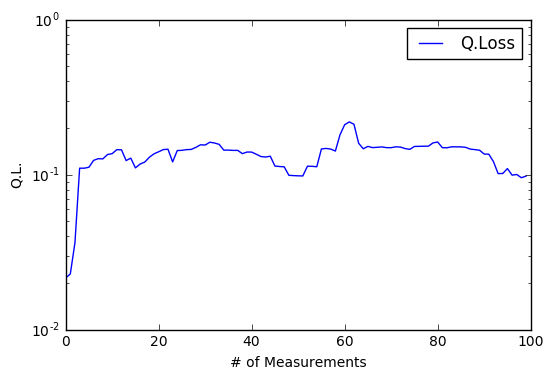

In [28]:
track_avg_loss = modeltest.ModelsList[0].QLosses
plt.semilogy(track_avg_loss, label='Q.Loss' )
plt.legend()
plt.xlabel('# of Measurements')
plt.ylabel('Q.L.')

### saturation

In [29]:
imp.reload(quti)

<module 'QMD_Utils' from '..\\Libraries\\QML_lib\\QMD_Utils.py'>

In [30]:
quti.DetectSaturation(modeltest, use_datalength = 10, saturate_STN=3.)

[False, False, False]

In [31]:
volume_list = modeltest.ModelsList[0].VolumeList

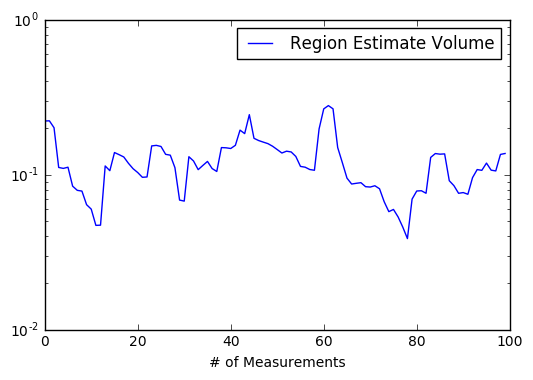

In [32]:
plt.semilogy(volume_list, label='Region Estimate Volume')
plt.legend()
plt.xlabel('# of Measurements')

plt.show()

### pruning

In [106]:
array_KLogTotLikelihood = np.array(list(map(lambda model: model.KLogTotLikelihood, modeltest.ModelsList)))
renorm_KLogTotLikelihood = abs(1/array_KLogTotLikelihood)/abs(sum(1/abs(array_KLogTotLikelihood) ))

In [107]:
renorm_KLogTotLikelihood

array([ 0.17577676,  0.43583814,  0.38838509])

In [112]:
quti.FloorPruningRule(modeltest, floor_thresh=0.5)

In [113]:
modeltest.ModelNames

['sy_']

# MULTIPLE testing running

In [43]:
nruns = 100
pool_len = 30
max_expnum = 100

collectTrueOpList = []
collectTrueNames = []
collectTrueParams = []

collectEstimParams = []

collectKfactorsDict = []
collectLogL = []


for run in range(nruns):
    modeltest = qmd.ModelsDevelopmentClass(7, lst)
    collectTrueOpList.append(modeltest.TrueOpList)
    collectTrueNames.append(modeltest.TrueNames)
    
    modeltest.InitialiseAllActiveModels()
    
    collectTrueParams.append(modeltest.TrueParamsList)
    
    start=time.clock()
    modeltest.UpdateAllActiveModels(expnum=max_expnum)
    end=time.clock()
    print('Total elapsed time for the learning process: ' + str(end-start))
    
    
    collectEstimParams.append([modeltest.ModelsList[i].NewEval for i in range(len(modeltest.ModelsList)) ])
    
    tpool = modeltest.DataPool(pool_len)
    
    start=time.clock()
    modeltest.UpdateAllLogLikelihoods(tpool)
    end=time.clock()
    print('Total elapsed time for Bayes factor update: ' + str(end-start))
    
    collectKfactorsDict.append(modeltest.ComputeAllBayesFactors(fromLogL = True))
    
    collectLogL.append([modeltest.ModelsList[i].KLogTotLikelihood for i in range(len(modeltest.ModelsList)) ])
    

[[ 0.28373093]]
Initialization Ready
[[ 0.79496512]]
Initialization Ready
[[ 0.65433395]]
Initialization Ready
[[ 0.59362754  0.57771639]]
Initialization Ready
[[ 0.93093284  0.78738376]]
Initialization Ready
[[ 0.10319658  0.47923719]]
Initialization Ready
[[ 0.49869948  0.64163908  0.27039071]]
Initialization Ready
Initial time selected > 0.480551797824
Final time selected > 12.3957368564
Final Parameters mean and stdev:[ 0.04242886  0.18497032]
Batch single time 0 elapsed time: 16.016474024989407


Initial time selected > 2.81627638157
Final time selected > 3.39662970016
Final Parameters mean and stdev:[-0.10326969  0.0812248 ]
Batch single time 1 elapsed time: 16.130257091723138


Initial time selected > 0.445064788318
Final time selected > 245.41867263
Exiting learning for Reaching Cov. Norm. Thrshold of 9.91590806295e-07
 at Iteration Number 84
Final Parameters mean and stdev:[ 0.09072526  0.00125976]
Batch single time 2 elapsed time: 20.09900802281902


Initial time selected > 0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000316444640762). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2030680725702876). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0089141504609553). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.592754768275632). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7104171667753825). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 252.41301362561626


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000001983198035). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.007576551774925). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.246965204432824). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.257700752218959). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.562717708427237). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.23037216690273
[[ 0.96412618]]
Initialization Ready
[[ 0.97305838]]
Initialization Ready
[[ 0.11077308]]
Initialization Ready
[[ 0.05453993  0.1946145 ]]
Initialization Ready
[[ 0.82452321  0.79800703]]
Initialization Ready
[[ 0.86975691  0.13652113]]
Initialization Ready
[[ 0.13207887  0.42329597  0.1926799 ]]
Initialization Ready
Initial time selected > 1.04877429469
Final time selected > 0.727001095589
Final Parameters mean and stdev:[ 0.31103121  0.70177042]
Batch single time 0 elapsed time: 15.689647603781168


Initial time selected > 0.487001504811
Final time selected > 1010.0417339
Exiting learning for Reaching Cov. Norm. Thrshold of 6.52586615968e-07
 at Iteration Number 70
Final Parameters mean and stdev:[ 0.55959789  0.00109318]
Batch single time 1 elapsed time: 11.138211713169994


Initial time selected > 0.559188170094
Final time selected > 9.30488491072
Final Parameters mean and stdev:[-0.05540852  0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.871768512821702). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7650368143834556). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0297231817771089). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2093744393171855). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.099023180177157). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8495550423105145). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.44902394662836


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.987176442141033). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.722832514616659). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7926512045040417). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.8400093778793476). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7250712814626494). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0002760085950653). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.80510084968932
[[ 0.64636396]]
Initialization Ready
[[ 0.6474706]]
Initialization Ready
[[ 0.20838629]]
Initialization Ready
[[ 0.58697777  0.77836278]]
Initialization Ready
[[ 0.23390234  0.31982155]]
Initialization Ready
[[ 0.17643554  0.19260914]]
Initialization Ready
[[ 0.82424513  0.00426596  0.06965208]]
Initialization Ready
Initial time selected > 1.26334181796
Final time selected > 1.05688256279
Final Parameters mean and stdev:[ 0.26031926  0.77225458]
Batch single time 0 elapsed time: 15.653657477205115


Initial time selected > 17.615530036
Final time selected > 98.4107845245
Final Parameters mean and stdev:[ 0.57045917  0.00802001]
Batch single time 1 elapsed time: 15.798375109331346


Initial time selected > 1.80257716726
Final time selected > 10.7332065149
Final Parameters mean and stdev:[ 0.29807621  0.03357556]
Batch single time 2 elapsed time: 23.711617494870325


Initial time selected > 0.4776759

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.00000804836595). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3690811595454353). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6279574097466538). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.83402187851009). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1166552074417055). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5777827855305233). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.1566527373493516). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.05043312099383
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.90725522016928). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.915301395380806). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.589378943634188). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.16733506939272
[[ 0.67320431]]
Initialization Ready
[[ 0.4942778]]
Initialization Ready
[[ 0.86022494]]
Initialization Ready
[[ 0.38102647  0.3179876 ]]
Initialization Ready
[[ 0.85597336  0.95644954]]
Initialization Ready
[[ 0.64848011  0.0940247 ]]
Initialization Ready
[[ 0.10517935  0.11656591  0.51819709]]
Initialization Ready
Initial time selected > 26.2685838765
Final time selected > 3.062108615
Final Parameters mean and stdev:[-0.81963085  0.57943345]
Batch single time 0 elapsed time: 15.546241616826137


Initial time selected > 1.17621295675
Final time selected > 429.556362004
Exiting learning for Reaching Cov. Norm. Thrshold of 8.57014023414e-07
 at Iteration Number 98
Final Parameters mean and stdev:[ 0.88192123  0.00233965]
Batch single time 1 elapsed time: 15.376076677942365


Initial time selected > 0.469925004171
Final time selected > 51.0978494435
Final Parameters mean and stdev:[ 1.00653812  0.003

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.496553801529856). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.8479471735365993). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.007058251784969). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4652186064755992). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9722105307931703). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.599932667261765). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.542138228793858). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.64678110621844


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3725212410144791). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4954630938623152). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.807890810102151). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.024076258201633). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 215.69430490420245
[[ 0.15516415]]
Initialization Ready
[[ 0.44770978]]
Initialization Ready
[[ 0.78950832]]
Initialization Ready
[[ 0.62579073  0.21286886]]
Initialization Ready
[[ 0.71472025  0.17701729]]
Initialization Ready
[[ 0.03385457  0.81038808]]
Initialization Ready
[[ 0.84188657  0.57699512  0.69397143]]
Initialization Ready
Initial time selected > 1.20265805541
Final time selected > 3.72458622427
Final Parameters mean and stdev:[ 0.97706863  0.08865343]
Batch single time 0 elapsed time: 15.499806000992066


Initial time selected > 1.05334605573
Final time selected > 0.605865275214
Final Parameters mean and stdev:[ 0.68225367  0.4376502 ]
Batch single time 1 elapsed time: 15.59444010760626


Initial time selected > 3.82019950686
Final time selected > 22.3909772906
Final Parameters mean and stdev:[ 0.61413763  0.02366036]
Batch single time 2 elapsed time: 23.561674469664013


Initial time selected > 0.89600

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5373092972069382). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.166971037652497). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.225920008645487). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4395592159187613). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.011026310067791). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4554707559741296). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8562911898005166). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 252.7537543442868


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.8229648333054795). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0005693691607096). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6700290272974971). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1465909737324653). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3078020115377522). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.26314608125313
[[ 0.85168314]]
Initialization Ready
[[ 0.64046809]]
Initialization Ready
[[ 0.18708991]]
Initialization Ready
[[ 0.12379067  0.53230989]]
Initialization Ready
[[ 0.44117815  0.3736116 ]]
Initialization Ready
[[ 0.5688243   0.06247804]]
Initialization Ready
[[ 0.22378521  0.36632594  0.15282414]]
Initialization Ready
Initial time selected > 4.56590789924
Final time selected > 1.40435944802
Final Parameters mean and stdev:[ 0.07044695  0.28219799]
Batch single time 0 elapsed time: 15.849360763336335


Initial time selected > 0.40089373643
Final time selected > 611.055722614
Final Parameters mean and stdev:[ 0.64151617  0.00652017]
Batch single time 1 elapsed time: 15.79941495725734


Initial time selected > 2.28528067463
Final time selected > 48.2595944
Final Parameters mean and stdev:[-0.10143095  0.01234106]
Batch single time 2 elapsed time: 23.85004505676625


Initial time selected > 0.5478117719

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000004972381251). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4491224360540325). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0920539875563247). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0143603869026268). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.367677144809782). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.613591465377775). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.3134606840813
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.341442739592521). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4986076432810715). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3993440982312741). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.848595904280244). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.902433830818458). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.14727769070987
[[ 0.87556857]]
Initialization Ready
[[ 0.89033486]]
Initialization Ready
[[ 0.50287746]]
Initialization Ready
[[ 0.52990902  0.42144034]]
Initialization Ready
[[ 0.09349901  0.01820473]]
Initialization Ready
[[ 0.82971301  0.35144202]]
Initialization Ready
[[ 0.25235361  0.88469902  0.13658431]]
Initialization Ready
Initial time selected > 1.8818221663
Final time selected > 2.57122668187
Final Parameters mean and stdev:[ 0.94035671  0.12042529]
Batch single time 0 elapsed time: 15.791032611035007


Initial time selected > 32.1089948284
Final time selected > 118.82347317
Final Parameters mean and stdev:[ 0.46256537  0.00398178]
Batch single time 1 elapsed time: 15.648341043635355


Initial time selected > 14.266422269
Final time selected > 1.85752836969
Final Parameters mean and stdev:[ 1.13520601  0.40482175]
Batch single time 2 elapsed time: 24.342755196425514


Initial time selected > 2.09037036

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning
C:\Program Files\Anaconda3\lib\site-packages\qinfer\resamplers.py:260: ResamplerWarning: Covariance has zero norm; adding in small covariance in resampler. Consider increasing n_particles to improve covariance estimates.
  ResamplerWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.638665883019949). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000157294083385). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0375492106417443). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.300241383647284). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7518920364983877). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 264.2993305378941


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.260104469111632). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0151473287858739). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.699519347628025). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.189020258437576). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.821988270774977). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 229.16341569352608
[[ 0.28482887]]
Initialization Ready
[[ 0.51697045]]
Initialization Ready
[[ 0.60917203]]
Initialization Ready
[[ 0.40912776  0.96150197]]
Initialization Ready
[[ 0.99216585  0.5882473 ]]
Initialization Ready
[[ 0.37172525  0.98061079]]
Initialization Ready
[[ 0.95642796  0.60351563  0.79382923]]
Initialization Ready
Initial time selected > 0.505227192846
Final time selected > 0.743173536208
Final Parameters mean and stdev:[-0.96690306  1.52206386]
Batch single time 0 elapsed time: 15.513827229648086


Initial time selected > 76.1035308404
Final time selected > 9.27231662417
Final Parameters mean and stdev:[ 0.43637955  0.03605882]
Batch single time 1 elapsed time: 15.697549256216007


Initial time selected > 0.908441408152
Final time selected > 922.982834039
Final Parameters mean and stdev:[-0.34198236  0.00587114]
Batch single time 2 elapsed time: 23.987511893198644


Initial time selected > 0.43

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0023106824878865). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1513098447737287). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.3417741795373526). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.142814905848634). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4445011498216564). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0474977824902378). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0059527760470137). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.66177696470368
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3486718197666432). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7685047634972573). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.039994849597518). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0006358657846561). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning
C:\Program Files\Anaconda3\lib\site-packages\qinfer\utils.py:268: ApproximationWarning: Numerical error in covariance estimation causing positive semidefinite violation.
  warnings.warn('Numerical error in covariance estimation causing positive semidefinite violation.', ApproximationWarning)


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.11186658165116
[[ 0.35676942]]
Initialization Ready
[[ 0.26883578]]
Initialization Ready
[[ 0.88022616]]
Initialization Ready
[[ 0.65594963  0.27879987]]
Initialization Ready
[[ 0.66624887  0.42509352]]
Initialization Ready
[[ 0.53827139  0.90572795]]
Initialization Ready
[[ 0.25912996  0.12334544  0.2819924 ]]
Initialization Ready
Initial time selected > 0.896086092825
Final time selected > 21.5655929839
Final Parameters mean and stdev:[ 0.20986053  0.0239228 ]
Batch single time 0 elapsed time: 15.679505693175088


Initial time selected > 0.415993246174
Final time selected > 330.766687223
Exiting learning for Reaching Cov. Norm. Thrshold of 9.9799668872e-07
 at Iteration Number 90
Final Parameters mean and stdev:[-0.1724889  0.000999 ]
Batch single time 1 elapsed time: 14.437578667259913


Initial time selected > 3.93485496862
Final time selected > 51.7757478484
Final Parameters mean and stdev:[ 1.10069642  0.10

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9446137796719574). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3749965784667615). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.180574758572538). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.368488195725901). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.7746741341650605). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3643123834562347). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9542251421013372). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.7448883247689
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.893790660116403). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.982426145045036). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.855723130725448). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0222901376814106). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9146913347180665). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.00722530435633
[[ 0.35925339]]
Initialization Ready
[[ 0.58921497]]
Initialization Ready
[[ 0.44462561]]
Initialization Ready
[[ 0.86799147  0.48275501]]
Initialization Ready
[[ 0.05044006  0.14373749]]
Initialization Ready
[[ 0.17224773  0.79958314]]
Initialization Ready
[[ 0.76725979  0.55851907  0.43299748]]
Initialization Ready
Initial time selected > 0.778493253851
Final time selected > 8.04268697971
Final Parameters mean and stdev:[ 2.03631236  0.26919634]
Batch single time 0 elapsed time: 15.762103584876968


Initial time selected > 0.56951521476
Final time selected > 539.514393048
Final Parameters mean and stdev:[ 0.77483848  0.03797012]
Batch single time 1 elapsed time: 15.770419719833626


Initial time selected > 7.58094300693
Final time selected > 714.784925982
Exiting learning for Reaching Cov. Norm. Thrshold of 7.67939553281e-07
 at Iteration Number 80
Final Parameters mean and stdev:[ 0.73646207  0.

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7273036530990327). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4205552963221955). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.387597913975241). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5670495505134263). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.083299781561079). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.516148486887644). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 251.63538316790437


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.359775031721038). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0027144723754648). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7247715410403666). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.980410194419479). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.7348142264028725). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1400407992575574). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.64255020634755
[[ 0.75645572]]
Initialization Ready
[[ 0.27500256]]
Initialization Ready
[[ 0.39746787]]
Initialization Ready
[[ 0.86380249  0.12309203]]
Initialization Ready
[[ 0.751059    0.08265863]]
Initialization Ready
[[ 0.40404672  0.35916061]]
Initialization Ready
[[ 0.5554184   0.07449325  0.61735762]]
Initialization Ready
Initial time selected > 3.43443522404
Final time selected > 4.44537064998
Final Parameters mean and stdev:[-1.01832312  0.55586721]
Batch single time 0 elapsed time: 15.77490818152819


Initial time selected > 0.689356863163
Final time selected > 13.973884465
Final Parameters mean and stdev:[ 0.73940111  0.01087981]
Batch single time 1 elapsed time: 15.831252975368443


Initial time selected > 0.511268564852
Final time selected > 3072.12073355
Final Parameters mean and stdev:[ 0.45955291  0.00427472]
Batch single time 2 elapsed time: 23.793472165115418


Initial time selected > 1.03561

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.762366962217108). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6915179800387519). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9537931430033293). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.678647652675723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4477385839935826). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7211641118518268). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.0105312328469


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.65372614102738). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.485622390742367). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.342369417004375). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7111490604669515). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.6253554717323
[[ 0.92297098]]
Initialization Ready
[[ 0.71446125]]
Initialization Ready
[[ 0.61429366]]
Initialization Ready
[[ 0.60347444  0.30923082]]
Initialization Ready
[[ 0.27259188  0.55278128]]
Initialization Ready
[[ 0.56521865  0.58055926]]
Initialization Ready
[[ 0.37347472  0.63473271  0.95393832]]
Initialization Ready
Initial time selected > 1.77986666743
Final time selected > 2.26596692813
Final Parameters mean and stdev:[-0.21656391  0.3089341 ]
Batch single time 0 elapsed time: 15.640355633949184


Initial time selected > 1.26020783463
Final time selected > 450.754768352
Exiting learning for Reaching Cov. Norm. Thrshold of 9.35234328417e-07
 at Iteration Number 84
Final Parameters mean and stdev:[-0.07430178  0.00130166]
Batch single time 1 elapsed time: 13.508266145451671


Initial time selected > 131.762971845
Final time selected > 891.299845046
Final Parameters mean and stdev:[ 0.4027523   0.00

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.8856951024256063). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0070068294871235). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0335642046832265). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.823304401067096). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9781148287720087). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.8556268041973563). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 253.49062713324383


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.001590310459922). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000037104771547). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.412409886115633). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 211.02096414196512
[[ 0.72149249]]
Initialization Ready
[[ 0.59007092]]
Initialization Ready
[[ 0.38952622]]
Initialization Ready
[[ 0.38596294  0.02605908]]
Initialization Ready
[[ 0.52501861  0.32327699]]
Initialization Ready
[[ 0.8350327   0.74755749]]
Initialization Ready
[[ 0.95290579  0.69433436  0.16059553]]
Initialization Ready
Initial time selected > 3.45577636084
Final time selected > 0.911373239254
Final Parameters mean and stdev:[ 0.19766835  0.51674408]
Batch single time 0 elapsed time: 15.632612557496032


Initial time selected > 1.21845815838
Final time selected > 783.284141997
Exiting learning for Reaching Cov. Norm. Thrshold of 7.14768245119e-07
 at Iteration Number 72
Final Parameters mean and stdev:[ 0.49103259  0.00124332]
Batch single time 1 elapsed time: 11.394049394927606


Initial time selected > 0.477319798091
Final time selected > 101.050344375
Final Parameters mean and stdev:[ 1.15854778  0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6767481764273378). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7614688351413856). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.63657801643505). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.39299524411046). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.567834683545895). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 249.57670277167017


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.730407054208426). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4831735923429492). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.192885526149865). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.670050668512383). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 208.15303409813896
[[ 0.350326]]
Initialization Ready
[[ 0.02673655]]
Initialization Ready
[[ 0.60366833]]
Initialization Ready
[[ 0.04201641  0.35439289]]
Initialization Ready
[[ 0.97062144  0.6185552 ]]
Initialization Ready
[[ 0.01750474  0.66718577]]
Initialization Ready
[[ 0.99604298  0.33327428  0.2236498 ]]
Initialization Ready
Initial time selected > 0.573863047543
Final time selected > 17.8871848436
Final Parameters mean and stdev:[-0.2712902   0.06942927]
Batch single time 0 elapsed time: 15.632709225943472


Initial time selected > 2.72711764449
Final time selected > 459.775996232
Final Parameters mean and stdev:[ 0.69380808  0.00343039]
Batch single time 1 elapsed time: 15.628139324393487


Initial time selected > 2.14951793767
Final time selected > 4.3764166626
Final Parameters mean and stdev:[-0.06961661  0.10498786]
Batch single time 2 elapsed time: 23.732188010861137


Initial time selected > 1.0131183

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6494076537123539). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.020504525401419). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3639923875574174). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1544654637397782). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.013117045047045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.368220727011196). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.52754190014457
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4934429133207456). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.610451184677069). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0547333819850169). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.0164700523128
[[ 0.70388617]]
Initialization Ready
[[ 0.93458738]]
Initialization Ready
[[ 0.15098859]]
Initialization Ready
[[ 0.43853813  0.42017136]]
Initialization Ready
[[ 0.3963208   0.96416547]]
Initialization Ready
[[ 0.55878104  0.15811984]]
Initialization Ready
[[ 0.44520711  0.37612874  0.76251531]]
Initialization Ready
Initial time selected > 0.680006040172
Final time selected > 0.899317308392
Final Parameters mean and stdev:[ 0.23498999  0.62454187]
Batch single time 0 elapsed time: 15.646434159186356


Initial time selected > 2.59425717651
Final time selected > 211.960929417
Final Parameters mean and stdev:[ 0.49487191  0.00884405]
Batch single time 1 elapsed time: 15.600987739660013


Initial time selected > 1.81888874642
Final time selected > 1.88589519909
Final Parameters mean and stdev:[ 0.2289088   0.57643902]
Batch single time 2 elapsed time: 24.061864164940744


Initial time selected > 0.4604

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0167112850609024). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0099720627156619). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.239682552856453). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.19015906219952). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.501307259415004). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 260.1581422972795
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0541756225856735). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 224.15391702536635
[[ 0.95744997]]
Initialization Ready
[[ 0.30048064]]
Initialization Ready
[[ 0.50175917]]
Initialization Ready
[[ 0.36738773  0.86690766]]
Initialization Ready
[[ 0.46076377  0.53483022]]
Initialization Ready
[[ 0.87471385  0.9438065 ]]
Initialization Ready
[[ 0.83211217  0.11230278  0.80788811]]
Initialization Ready
Initial time selected > 0.750110912919
Final time selected > 0.795015968162
Final Parameters mean and stdev:[-0.10742647  0.8887848 ]
Batch single time 0 elapsed time: 15.62965688660006


Initial time selected > 5.00817023539
Final time selected > 35.0643201197
Exiting learning for Reaching Cov. Norm. Thrshold of 5.52954463939e-07
 at Iteration Number 87
Final Parameters mean and stdev:[ 0.5294119   0.00149201]
Batch single time 1 elapsed time: 13.822577644295961


Initial time selected > 0.969515224948
Final time selected > 5.21037675586
Final Parameters mean and stdev:[ 0.60000592  0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0015020840914768). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.3659890174343037). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.592540498463235). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1506730513514). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7077968989602317). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.0090689570461
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000347092468). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.225718452318852). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.7715227995177
[[ 0.15102674]]
Initialization Ready
[[ 0.37550834]]
Initialization Ready
[[ 0.56196362]]
Initialization Ready
[[ 0.5546263   0.26386433]]
Initialization Ready
[[ 0.16356754  0.11971727]]
Initialization Ready
[[ 0.02202898  0.29231241]]
Initialization Ready
[[ 0.72641974  0.41698165  0.15227224]]
Initialization Ready
Initial time selected > 0.493478356799
Final time selected > 12.1953818833
Final Parameters mean and stdev:[ 0.3615775   0.04892179]
Batch single time 0 elapsed time: 15.798070537510284


Initial time selected > 0.89514843055
Final time selected > 59.5355539128
Final Parameters mean and stdev:[ 0.31310614  0.036124  ]
Batch single time 1 elapsed time: 15.773311165801715


Initial time selected > 8.0156182838
Final time selected > 3.11936089646
Final Parameters mean and stdev:[-0.10524775  0.11607358]
Batch single time 2 elapsed time: 23.412646484148354


Initial time selected > 1.036158

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0216315470955952). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.814126389321771). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.49876446875287). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7315769642524996). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.842842004475677). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3981112362608275). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 253.70738262232408


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.694602310343609). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.009884667333855). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.209762756142521). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 200.4806229420701
[[ 0.97875629]]
Initialization Ready
[[ 0.37771252]]
Initialization Ready
[[ 0.83063393]]
Initialization Ready
[[ 0.61579706  0.79428491]]
Initialization Ready
[[ 0.08027261  0.34307624]]
Initialization Ready
[[ 0.00476599  0.6435801 ]]
Initialization Ready
[[ 0.36652455  0.87908201  0.2667745 ]]
Initialization Ready
Initial time selected > 0.624921700622
Final time selected > 2.39187574183
Final Parameters mean and stdev:[-0.17403525  0.84122195]
Batch single time 0 elapsed time: 15.999360068119131


Initial time selected > 3.48061374188
Final time selected > 7.37159171068
Final Parameters mean and stdev:[ 0.06253791  0.27588294]
Batch single time 1 elapsed time: 15.905399661129195


Initial time selected > 0.810089773288
Final time selected > 278.279652381
Final Parameters mean and stdev:[ 1.1788381  0.0282397]
Batch single time 2 elapsed time: 23.64260317535991


Initial

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0149222583179962). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6462132322668095). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.593298887529329). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.59940724717827). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7142993341395842). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.488480898275988). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.93128793491633
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.451945106107916). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.837294459139015). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4059240535787603). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.0149340495623065). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.31068411465822
[[ 0.04254501]]
Initialization Ready
[[ 0.83347271]]
Initialization Ready
[[ 0.84852329]]
Initialization Ready
[[ 0.43680659  0.858487  ]]
Initialization Ready
[[ 0.7035908   0.44281793]]
Initialization Ready
[[ 0.00704371  0.43154436]]
Initialization Ready
[[ 0.35406383  0.56537972  0.6031701 ]]
Initialization Ready
Initial time selected > 1.13529174612
Final time selected > 0.549417521147
Final Parameters mean and stdev:[-0.00731765  0.51304438]
Batch single time 0 elapsed time: 15.705919022298986


Initial time selected > 0.778514919946
Final time selected > 337.559167469
Final Parameters mean and stdev:[ 0.44213493  0.0138268 ]
Batch single time 1 elapsed time: 15.841895112085695


Initial time selected > 64.8643416774
Final time selected > 108.509237776
Final Parameters mean and stdev:[-0.27735793  0.04007786]
Batch single time 2 elapsed time: 23.95525343355075


Init

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0800691335267218). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2316151498483408). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0004059228151418). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 255.92922644716236
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.597899033381875). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.032794744353045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.804667715524387). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 213.79929345958408
[[ 0.95480473]]
Initialization Ready
[[ 0.56520631]]
Initialization Ready
[[ 0.22972818]]
Initialization Ready
[[ 0.67561779  0.35416044]]
Initialization Ready
[[ 0.75819677  0.8200839 ]]
Initialization Ready
[[ 0.09938665  0.25090134]]
Initialization Ready
[[ 0.33350765  0.6885723   0.60920452]]
Initialization Ready
Initial time selected > 0.612796833568
Final time selected > 6.61443396482
Final Parameters mean and stdev:[ 0.30297368  0.07132478]
Batch single time 0 elapsed time: 15.730663827527678


Initial time selected > 0.636154070847
Final time selected > 2984.78361566
Final Parameters mean and stdev:[-0.12658728  0.00264404]
Batch single time 1 elapsed time: 15.561956198598637


Initial time selected > 2.13118284093
Final time selected > 1.62708232052
Final Parameters mean and stdev:[-0.25117966  0.0989975 ]
Batch single time 2 elapsed time: 23.40936737121956


Initial time selected > 0.5124

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.5702026652701475). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1393460575375722). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4599544013526597). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.370392092351383). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0091682685359356). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1011080523859877). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.09260903505674


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.096314211823599). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.070074956062522). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.615019736016865). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0144237646680865). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 222.94379822249357
[[ 0.00108833]]
Initialization Ready
[[ 0.84073566]]
Initialization Ready
[[ 0.26050411]]
Initialization Ready
[[ 0.53437639  0.6638306 ]]
Initialization Ready
[[ 0.43132733  0.34959451]]
Initialization Ready
[[ 0.98298764  0.72523916]]
Initialization Ready
[[ 0.78119681  0.42571985  0.30817306]]
Initialization Ready
Initial time selected > 1.01278911394
Final time selected > 0.567678006109
Final Parameters mean and stdev:[ 0.16569177  0.62530274]
Batch single time 0 elapsed time: 15.676112365814333


Initial time selected > 14.7493199832
Final time selected > 70.5112635201
Final Parameters mean and stdev:[ 0.17361618  0.01086713]
Batch single time 1 elapsed time: 15.752636036011609


Initial time selected > 4.40469744235
Final time selected > 5.96285794966
Final Parameters mean and stdev:[ 1.40456564  0.08303372]
Batch single time 2 elapsed time: 24.581737476304625


Initial time selected > 1.3196

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0013107305516795). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000004092193331). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.278267044280122). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9557020416097943). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.527747760465868). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.038080147693289). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 260.9702936535832
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8713794901799814). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.2971566518402975). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 226.8743975602465
[[ 0.64918383]]
Initialization Ready
[[ 0.05950707]]
Initialization Ready
[[ 0.74064489]]
Initialization Ready
[[ 0.972541    0.63442096]]
Initialization Ready
[[ 0.54256031  0.19187485]]
Initialization Ready
[[ 0.57121711  0.53648545]]
Initialization Ready
[[ 0.78558571  0.40271684  0.12523126]]
Initialization Ready
Initial time selected > 0.482769019649
Final time selected > 3.70951945101
Final Parameters mean and stdev:[-0.06599452  0.5962404 ]
Batch single time 0 elapsed time: 15.368455430218091


Initial time selected > 4.38328753698
Final time selected > 15.042486052
Final Parameters mean and stdev:[-0.19446614  0.04455077]
Batch single time 1 elapsed time: 15.551994382636622


Initial time selected > 7.68208949541
Final time selected > 11.4494703239
Final Parameters mean and stdev:[ 0.39618533  0.0648557 ]
Batch single time 2 elapsed time: 23.637777036210537


Initial time selected > 0.496198

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.891171674393402). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9265259878320617). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0844979492584965). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000044903638524). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 252.35050688034426
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 207.60668257061116
[[ 0.75423927]]
Initialization Ready
[[ 0.36262176]]
Initialization Ready
[[ 0.9596991]]
Initialization Ready
[[ 0.11755804  0.54910755]]
Initialization Ready
[[ 0.56229288  0.50951736]]
Initialization Ready
[[ 0.93942724  0.22519559]]
Initialization Ready
[[ 0.15694053  0.14211079  0.93276284]]
Initialization Ready
Initial time selected > 6.75781480532
Final time selected > 4.00086741044
Final Parameters mean and stdev:[ 1.1384471   0.68259377]
Batch single time 0 elapsed time: 15.689704876527685


Initial time selected > 0.918610292904
Final time selected > 11.1284611392
Final Parameters mean and stdev:[ 0.27382425  0.10155118]
Batch single time 1 elapsed

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9624148322169135). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.485578694620154). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3524590525428626). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0001133267699327). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.656104790513082). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.4340009415246


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000000081741). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0106225729791305). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0450383334205855). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.320598002420874). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.39538057242316
[[ 0.66651663]]
Initialization Ready
[[ 0.88851047]]
Initialization Ready
[[ 0.49345164]]
Initialization Ready
[[ 0.86000413  0.18972525]]
Initialization Ready
[[ 0.38950228  0.16101693]]
Initialization Ready
[[ 0.20704333  0.6266029 ]]
Initialization Ready
[[ 0.47092536  0.89718417  0.48166826]]
Initialization Ready
Initial time selected > 1.94553844438
Final time selected > 5.15597690823
Final Parameters mean and stdev:[ 1.409685    0.34215134]
Batch single time 0 elapsed time: 15.642722024582326


Initial time selected > 0.544619528507
Final time selected > 23.9613503811
Final Parameters mean and stdev:[ 0.01703567  0.02209099]
Batch single time 1 elapsed time: 15.787636304166881


Initial time selected > 2.8386011312
Final time selected > 2312.26062033
Final Parameters mean and stdev:[ 0.66223444  0.00447584]
Batch single time 2 elapsed time: 24.204078680169914


Initial time selected > 1.30891

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.063987551178004). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0031316905082828). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000288074532). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0358317941546713). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9204915524066342). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.451154592040429). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 255.25567182253872


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6592351279824686). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.035211162676372). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.711647023764897). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.635912949895742). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2166092905950143). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.58993674837802
[[ 0.66857817]]
Initialization Ready
[[ 0.65946099]]
Initialization Ready
[[ 0.59037905]]
Initialization Ready
[[ 0.83741396  0.58877752]]
Initialization Ready
[[ 0.83684822  0.48616171]]
Initialization Ready
[[ 0.02181273  0.80296434]]
Initialization Ready
[[ 0.57721261  0.06723266  0.49574171]]
Initialization Ready
Initial time selected > 4.39156361966
Final time selected > 64.0491585785
Final Parameters mean and stdev:[ 0.62583726  0.01383988]
Batch single time 0 elapsed time: 15.71348200411012


Initial time selected > 1.16214982498
Final time selected > 178.064375362
Final Parameters mean and stdev:[ 0.03541897  0.00274935]
Batch single time 1 elapsed time: 15.93676459974813


Initial time selected > 1.01646373683
Final time selected > 42.2852138695
Final Parameters mean and stdev:[ 0.24565565  0.00910979]
Batch single time 2 elapsed time: 24.256512374555314


Initial time selected > 0.5022201

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0726428475243435). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.081914992937305). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.124809134926747). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.5709860909992
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2263736589378047). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5006649839178665). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7569365747978742). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8874338890518758). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 208.14026260712126
[[ 0.20710529]]
Initialization Ready
[[ 0.83945609]]
Initialization Ready
[[ 0.36178015]]
Initialization Ready
[[ 0.4634444   0.94625149]]
Initialization Ready
[[ 0.95064021  0.30786339]]
Initialization Ready
[[ 0.91704587  0.54758979]]
Initialization Ready
[[ 0.15478077  0.37060653  0.9260888 ]]
Initialization Ready
Initial time selected > 1.73170428742
Final time selected > 1.89309356232
Final Parameters mean and stdev:[ 0.86944209  0.1664755 ]
Batch single time 0 elapsed time: 15.779076180697302


Initial time selected > 2.00789582894


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.802995682440319). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


Final time selected > 334.307181432
Final Parameters mean and stdev:[ 0.40494567  0.01435034]
Batch single time 1 elapsed time: 15.809116231888765


Initial time selected > 1.12207826609
Final time selected > 584.692946004
Exiting learning for Reaching Cov. Norm. Thrshold of 8.10448473901e-07
 at Iteration Number 95
Final Parameters mean and stdev:[ 0.06870387  0.00117607]
Batch single time 2 elapsed time: 23.456065514723377


Initial time selected > 1.05513391951
Final time selected > 8.18731234453
Final Parameters mean and stdev:[ 0.46398568  0.11448255]
Final Parameters mean and stdev:[-0.21541471  0.19275106]
Batch single time 3 elapsed time: 15.702420087967766


Initial time selected > 1.37624637494
Final time selected > 76.466062159
Final Parameters mean and stdev:[ 0.67023029  0.16323182]
Final Parameters mean and stdev:[ 0.25253127  0.16509313]
Batch single time 4 elapsed time: 15.756188932520672


Initial time selected > 0.447532278114
Final time selected > 11.2604473642
Final

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1331391114063252). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.626453186671127). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0002511191860362). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000256909621437). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.53456635398122). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0176056077327695). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.65427423514484


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.570846141985604). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.6027799270079592). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0520247763291202). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.919332309185981). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 218.38838568327083
[[ 0.65422009]]
Initialization Ready
[[ 0.68376592]]
Initialization Ready
[[ 0.75765963]]
Initialization Ready
[[ 0.16043583  0.39264022]]
Initialization Ready
[[ 0.73082328  0.30653586]]
Initialization Ready
[[ 0.53592784  0.03032323]]
Initialization Ready
[[ 0.51347122  0.33051869  0.92289048]]
Initialization Ready
Initial time selected > 0.88363645368
Final time selected > 1.99693809197
Final Parameters mean and stdev:[-0.33674794  0.50205563]
Batch single time 0 elapsed time: 16.21741793279216


Initial time selected > 0.722464596872
Final time selected > 761.565002353
Final Parameters mean and stdev:[-0.94260295  0.0141849 ]
Batch single time 1 elapsed time: 15.692293074896952


Initial time selected > 1.1284669259
Final time selected > 605.094643014
Exiting learning for Reaching Cov. Norm. Thrshold of 5.77697859327e-07
 at Iteration Number 87
Final Parameters mean and stdev:[ 0.39902563  0.00

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0079881668674047). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1139720252620318). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3227376162863573). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.936043408493565). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1265902781065353). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0103454226335025). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.52137200336074
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3628653609535457). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7950064550172071). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.746423981235382). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.1241835323308
[[ 0.33421642]]
Initialization Ready
[[ 0.1453382]]
Initialization Ready
[[ 0.98219118]]
Initialization Ready
[[ 0.25377521  0.56003079]]
Initialization Ready
[[ 0.68391189  0.21471438]]
Initialization Ready
[[ 0.52986605  0.89176738]]
Initialization Ready
[[ 0.60736836  0.19048878  0.53362545]]
Initialization Ready
Initial time selected > 4.23397395733
Final time selected > 19.8762570644
Final Parameters mean and stdev:[ 1.06634519  0.16929439]
Batch single time 0 elapsed time: 15.572198750327516


Initial time selected > 4.78646929188
Final time selected > 2.13947846734
Final Parameters mean and stdev:[ 1.03611532  0.42626941]
Batch single time 1 elapsed time: 15.59565574644148


Initial time selected > 0.724969051843
Final time selected > 12.7104079679
Final Parameters mean and stdev:[ 1.05590672  0.54811738]
Batch single time 2 elapsed time: 23.733775757009425


Initial time selected > 0.6241788

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.287573550302713). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5849653767196534). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.132189358857485). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.132846820699693). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.5716442309804


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.661199809083335). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0082960127821878). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.484639568453262). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.3148564175608
[[ 0.85438367]]
Initialization Ready
[[ 0.13954254]]
Initialization Ready
[[ 0.52361718]]
Initialization Ready
[[ 0.16445741  0.60234162]]
Initialization Ready
[[ 0.71746628  0.24979186]]
Initialization Ready
[[ 0.19763623  0.67944351]]
Initialization Ready
[[ 0.309989    0.31276968  0.24096957]]
Initialization Ready
Initial time selected > 0.607983386783
Final time selected > 31.6898385764
Final Parameters mean and stdev:[ 0.51776534  0.00773318]
Batch single time 0 elapsed time: 15.889326214297398


Initial time selected > 0.773126960621
Final time selected > 71.9112993991
Final Parameters mean and stdev:[ 0.20573476  0.0087905 ]
Batch single time 1 elapsed time: 15.765534983715042


Initial time selected > 5.48197840991
Final time selected > 1020.22269278
Final Parameters mean and stdev:[ 0.32193902  0.00339361]
Batch single time 2 elapsed time: 24.473222508917388


Initial time selected > 0.3837

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9650324393385916). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.850024906170752). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.086944258512696). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9469391831100133). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.629571972628408). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.1867886013333
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9657610346507186). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0383244361480755). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0155770678846299). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6834284081213546). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 205.63993684769594
[[ 0.438955]]
Initialization Ready
[[ 0.45255938]]
Initialization Ready
[[ 0.83945838]]
Initialization Ready
[[ 0.3018196   0.33409107]]
Initialization Ready
[[ 0.52498691  0.3603758 ]]
Initialization Ready
[[ 0.83178547  0.98934895]]
Initialization Ready
[[ 0.81078285  0.42893317  0.4970439 ]]
Initialization Ready
Initial time selected > 0.390041002506
Final time selected > 0.53381988119
Final Parameters mean and stdev:[ 0.16445882  0.92638507]
Batch single time 0 elapsed time: 15.78912506447341


Initial time selected > 0.524356430234
Final time selected > 698.752022514
Exiting learning for Reaching Cov. Norm. Thrshold of 9.27854904464e-07
 at Iteration Number 96
Final Parameters mean and stdev:[ 1.19966712  0.00186642]
Batch single time 1 elapsed time: 15.336281389932992


Initial time selected > 0.769218706859
Final time selected > 5.92050151934
Final Parameters mean and stdev:[ 1.46378672  0.0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.200936795073299). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.66925166091175). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2361373123171537). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.0562663081375465). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4443812273753216). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0834609515358045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.551621733320697). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.34788027943796


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6513299317161623). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0847004308926764). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.8334026890641715). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2204328794051407). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.465207853341153). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.433310795130892). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.39839484028744
[[ 0.71871242]]
Initialization Ready
[[ 0.78544259]]
Initialization Ready
[[ 0.86268573]]
Initialization Ready
[[ 0.83236435  0.29966522]]
Initialization Ready
[[ 0.09400405  0.1353572 ]]
Initialization Ready
[[ 0.17993885  0.80275726]]
Initialization Ready
[[ 0.43344546  0.24429403  0.33039503]]
Initialization Ready
Initial time selected > 1.05157627994
Final time selected > 191.296048858
Final Parameters mean and stdev:[ 0.05637469  0.00794259]
Batch single time 0 elapsed time: 15.81070828177144


Initial time selected > 0.94293900555
Final time selected > 532.820070671
Exiting learning for Reaching Cov. Norm. Thrshold of 6.74281503299e-07
 at Iteration Number 95
Final Parameters mean and stdev:[  1.40319251e+00   1.13815415e-03]
Batch single time 1 elapsed time: 14.899710127079743


Initial time selected > 8.34267716451
Final time selected > 4.48825892847
Final Parameters mean and stdev:[ 0.5607

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.424643650161282). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.6919853493494927). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8601895772552293). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000002693334673). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5407847866492568). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.276909927676989). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 264.7218064154731
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6463934766121877). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.698908997199053). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.208518897092012). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9956633303284048). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.8414461997054
[[ 0.70400923]]
Initialization Ready
[[ 0.41317567]]
Initialization Ready
[[ 0.82332136]]
Initialization Ready
[[ 0.03640325  0.73452478]]
Initialization Ready
[[ 0.10757704  0.80319507]]
Initialization Ready
[[ 0.58497236  0.51581441]]
Initialization Ready
[[ 0.22959636  0.83592677  0.4780298 ]]
Initialization Ready
Initial time selected > 1.22268290228
Final time selected > 1.34996466073
Final Parameters mean and stdev:[ 0.91107563  0.5131404 ]
Batch single time 0 elapsed time: 15.523126932954256


Initial time selected > 8.30189357444
Final time selected > 341.771892347
Final Parameters mean and stdev:[ 1.11603915  0.00652371]
Batch single time 1 elapsed time: 16.107398976506374


Initial time selected > 6.4178754105
Final time selected > 18.0608290381
Final Parameters mean and stdev:[-0.11948395  0.17021447]
Batch single time 2 elapsed time: 24.38440704832101


Initial time selected > 1.58881797

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5956081042868784). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0008699828317904). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2297819549424682). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.608980080192832). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.331372727658048). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0128563399625787). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.334510133882599). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.75816964253136
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.395640488598584). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.0957944027250806). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.121237562906028). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5387357555770964). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2999894103857845). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.27886066302744
[[ 0.45947428]]
Initialization Ready
[[ 0.4173923]]
Initialization Ready
[[ 0.09523132]]
Initialization Ready
[[ 0.38054489  0.44953288]]
Initialization Ready
[[ 0.38287962  0.90067388]]
Initialization Ready
[[ 0.24082575  0.77328242]]
Initialization Ready
[[ 0.12678283  0.05975617  0.30656554]]
Initialization Ready
Initial time selected > 1.59442157445
Final time selected > 3.47737648304
Final Parameters mean and stdev:[ 1.4841179   0.13861663]
Batch single time 0 elapsed time: 16.059173008050493


Initial time selected > 0.513732582341
Final time selected > 28.3034697301
Final Parameters mean and stdev:[-0.09933574  0.01728502]
Batch single time 1 elapsed time: 15.802663944059532


Initial time selected > 6.03851693694
Final time selected > 10.4199724872
Final Parameters mean and stdev:[ 0.75970453  0.04719481]
Batch single time 2 elapsed time: 24.51141647746772


Initial time selected > 1.809370

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000458874362723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0003148204597376). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1794422922710974). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.195262712120609). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.340647725312137). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0320459297666191). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0017818420725815). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 260.0908276209557
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7266878596377084). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.283148188178069). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.30854940671284). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 228.3777879081008
[[ 0.01826896]]
Initialization Ready
[[ 0.81216964]]
Initialization Ready
[[ 0.82992927]]
Initialization Ready
[[ 0.18864664  0.93829844]]
Initialization Ready
[[ 0.5736259   0.27322584]]
Initialization Ready
[[ 0.22724101  0.54962921]]
Initialization Ready
[[ 0.75840162  0.85916838  0.11438387]]
Initialization Ready
Initial time selected > 1.10523034748
Final time selected > 5.78743739449
Final Parameters mean and stdev:[ 0.33516077  0.37879202]
Batch single time 0 elapsed time: 15.660246160241513


Initial time selected > 11.5684762736
Final time selected > 18.6649616206
Final Parameters mean and stdev:[ 1.12952659  0.09666822]
Batch single time 1 elapsed time: 15.718504128602945


Initial time selected > 94.8357807203
Final time selected > 8.43172985332
Final Parameters mean and stdev:[-0.16286186  0.19977721]
Batch single time 2 elapsed time: 23.92565335621839


Initial

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.251180875627188). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000000001688). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.237943703385909). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.716218184463935). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7035040383895654). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.688091527283228). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 256.41129345693844
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3820182515558819). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.558453991451177). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 228.91603914939697
[[ 0.83299713]]
Initialization Ready
[[ 0.37786938]]
Initialization Ready
[[ 0.94040399]]
Initialization Ready
[[ 0.20677906  0.63950901]]
Initialization Ready
[[ 0.83068831  0.95216832]]
Initialization Ready
[[ 0.28597364  0.75689134]]
Initialization Ready
[[ 0.97472617  0.88713232  0.3989667 ]]
Initialization Ready
Initial time selected > 1.02687905885
Final time selected > 0.672945177357
Final Parameters mean and stdev:[-0.56290703  0.52878465]
Batch single time 0 elapsed time: 15.49019146311548


Initial time selected > 1.0011351203
Final time selected > 203.688261415
Final Parameters mean and stdev:[ 0.5680052   0.00220138]
Batch single time 1 elapsed time: 15.755063672062533


Initial time selected > 1.23579121189
Final time selected > 11.2342494225
Final Parameters mean and stdev:[ 0.2663615   0.28178133]
Batch single time 2 elapsed time: 23.64256808338905


Initial time selected > 0.5109336

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0011325634014159). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0246488830122757). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6994226088101558). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4499158422461198). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.062311475803135). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0258037088068175). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.24286358426616


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.756225806339314). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.812100348874823). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.244221108702094). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.36328677553637). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7320189045456655). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 219.8873819204855
[[ 0.91370322]]
Initialization Ready
[[ 0.76097823]]
Initialization Ready
[[ 0.37600649]]
Initialization Ready
[[ 0.88920926  0.51010744]]
Initialization Ready
[[ 0.49681717  0.50239225]]
Initialization Ready
[[ 0.10624713  0.40352378]]
Initialization Ready
[[ 0.00422198  0.83729649  0.46402952]]
Initialization Ready
Initial time selected > 5.33659065747
Final time selected > 12.8329458702
Final Parameters mean and stdev:[-0.49072833  0.09006036]
Batch single time 0 elapsed time: 15.879409090939589


Initial time selected > 0.495722809382
Final time selected > 29.3973120171
Final Parameters mean and stdev:[ 0.24403195  0.16614792]
Batch single time 1 elapsed time: 15.704507067061058


Initial time selected > 3.89455857174
Final time selected > 175.984610411
Final Parameters mean and stdev:[ 0.70297646  0.0046754 ]
Batch single time 2 elapsed time: 24.477472610054974


Initial time selected > 0.81216

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2160364214064945). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000000902768). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.694925043202704). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.365807580416738). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0621928822438502). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0625929834719163). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 254.21215479929015


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.004228493215826). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1057208406521712). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.348665922440741). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.088921551307513). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.11583429174425
[[ 0.54623462]]
Initialization Ready
[[ 0.79478438]]
Initialization Ready
[[ 0.84003225]]
Initialization Ready
[[ 0.90437814  0.01623064]]
Initialization Ready
[[ 0.1026      0.61695069]]
Initialization Ready
[[ 0.86086447  0.5230251 ]]
Initialization Ready
[[ 0.90217864  0.01056352  0.70564839]]
Initialization Ready
Initial time selected > 0.527300777146
Final time selected > 7.31156878008
Final Parameters mean and stdev:[-0.61448768  0.29569508]
Batch single time 0 elapsed time: 16.05189506573879


Initial time selected > 1.41256341878
Final time selected > 3.63327497504
Final Parameters mean and stdev:[ 0.77243634  0.09893929]
Batch single time 1 elapsed time: 15.782670128191967


Initial time selected > 0.411656404639
Final time selected > 10017.2911772
Final Parameters mean and stdev:[-0.2361233   0.01353567]
Batch single time 2 elapsed time: 24.340850960426906


Initial time selected > 1.8370

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000007361287158). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0256036763353737). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0007325475170725). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5848062916550523). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4455790236272457). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1694622434267348). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.262749111689193). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.4357138269661
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2018560537414356). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.044241045281286). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 222.37570026689718
[[ 0.51711266]]
Initialization Ready
[[ 0.70155323]]
Initialization Ready
[[ 0.46771268]]
Initialization Ready
[[ 0.90575025  0.92765977]]
Initialization Ready
[[ 0.71610552  0.40298042]]
Initialization Ready
[[ 0.22688813  0.60654017]]
Initialization Ready
[[ 0.33246098  0.55889207  0.83600914]]
Initialization Ready
Initial time selected > 7.98239074283
Final time selected > 343.175153168
Final Parameters mean and stdev:[-0.21284083  0.02994249]
Batch single time 0 elapsed time: 15.682577564839448


Initial time selected > 1.81581352485
Final time selected > 562.808865413
Exiting learning for Reaching Cov. Norm. Thrshold of 9.57511469141e-07
 at Iteration Number 86
Final Parameters mean and stdev:[ 0.27594174  0.00130228]
Batch single time 1 elapsed time: 13.793711187783629


Initial time selected > 205.919938259
Final time selected > 289.480978382
Final Parameters mean and stdev:[-0.04397539  0.0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8123250984890946). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.473117673572423). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1221966737944946). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.399055208462894). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.435347330065759). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3962637377323242). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 253.63873114054877


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1755080287367266). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.053602664443469). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2144192508233034). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0213609242827406). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.12681410591176
[[ 0.69872447]]
Initialization Ready
[[ 0.40868669]]
Initialization Ready
[[ 0.71140209]]
Initialization Ready
[[ 0.17511073  0.09115249]]
Initialization Ready
[[ 0.91914019  0.93927369]]
Initialization Ready
[[ 0.25639887  0.22604698]]
Initialization Ready
[[ 0.28186948  0.78004205  0.86272096]]
Initialization Ready
Initial time selected > 0.822083076619
Final time selected > 0.785857569205
Final Parameters mean and stdev:[ 0.44341366  2.07494101]
Batch single time 0 elapsed time: 15.70169970939969


Initial time selected > 8.30106083257
Final time selected > 8.43437951946
Final Parameters mean and stdev:[-0.15067473  0.30052978]
Batch single time 1 elapsed time: 15.790376457392995


Initial time selected > 1.9464001898
Final time selected > 237.276010006
Final Parameters mean and stdev:[ 0.11218947  0.00458026]
Batch si

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0003578985270727). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1791061769650981). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9238305700212197). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7159769428689253). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.203649109785881). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1374885531814738). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000008607347546). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.5620671024699
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.764916138544511). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3082739699521326). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 219.37406782814287
[[ 0.02586396]]
Initialization Ready
[[ 0.13275887]]
Initialization Ready
[[ 0.63998048]]
Initialization Ready
[[ 0.15806     0.98884948]]
Initialization Ready
[[ 0.13572737  0.26790712]]
Initialization Ready
[[ 0.78253555  0.93126803]]
Initialization Ready
[[ 0.0073613   0.93763037  0.7866196 ]]
Initialization Ready
Initial time selected > 0.638795280574
Final time selected > 3.41228291376
Final Parameters mean and stdev:[-0.98703663  0.30931267]
Batch single time 0 elapsed time: 15.695862193169887


Initial time selected > 1.03408982839
Final time selected > 1232.70215394
Exiting learning for Reaching Cov. Norm. Thrshold of 9.81051859417e-07
 at Iteration Number 85
Final Parameters mean and stdev:[ 0.69278629  0.00099048]
Batch single time 1 elapsed time: 13.567596405257063


Initial time selected > 0.590296167298
Final time selected > 2.8098585

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000141794509307). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000001004344654). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0009153988497588). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.472589354074273). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2818103858259946). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.9524185982118
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9660094435170763). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 224.65666479288484
[[ 0.03281751]]
Initialization Ready
[[ 0.43590776]]
Initialization Ready
[[ 0.42622864]]
Initialization Ready
[[ 0.61055646  0.59443316]]
Initialization Ready
[[ 0.791261    0.09690926]]
Initialization Ready
[[ 0.67072458  0.24051105]]
Initialization Ready
[[ 0.54610513  0.42507121  0.25308426]]
Initialization Ready
Initial time selected > 0.600866521419
Final time selected > 0.900882779674
Final Parameters mean and stdev:[ 0.61263525  0.59099504]
Batch single time 0 elapsed time: 15.591446696289495


Initial time selected > 10.4170821912
Final time selected > 137.825469377
Final Parameters mean and stdev:[ 0.67401069  0.01491555]
Batch single time 1 elapsed time: 15.662500984893995


Initial time selected > 16.3289595788
Final time selected > 852.258958592
Final Parameters mean and stdev:[-0.57002898  0.00393775]
Batch single time 2 elapsed time

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.292993256572125). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.14388438317948). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.958305169941909). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1213753221472587). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.191773689009219). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000475032398). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.407091593428889). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.25880560173755


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.805275151607579). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.622469515003114). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.134359567317828). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.71545245137168
[[ 0.26102751]]
Initialization Ready
[[ 0.58754525]]
Initialization Ready
[[ 0.38643844]]
Initialization Ready
[[ 0.59404277  0.14746062]]
Initialization Ready
[[ 0.96338754  0.55503582]]
Initialization Ready
[[ 0.9141041   0.76905953]]
Initialization Ready
[[ 0.87425818  0.25839256  0.70179994]]
Initialization Ready
Initial time selected > 0.949607239532
Final time selected > 15.4651066103
Final Parameters mean and stdev:[ 0.72017312  0.29676256]
Batch single time 0 elapsed time: 15.809677703422494


Initial time selected > 0.560741651231
Final time selected > 1547.50900897
Final Parameters mean and stdev:[ 0.46335413  0.00234923]
Batch single time 1 elapsed time: 15.955215693131322


Initial time selected > 1.22987479822
Final time selected > 20.1060455691
Final Parameters mean and stdev:[ 0.7834861   0.05751063]
Batch single time 2 elapsed time: 23.895289531934395


Initial time selected > 0.418

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.53514206513796). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3918431194811234). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2536670090954916). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.248386197208155). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.377135564496162). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.032475773245737). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.0718124075938


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4238065784935623). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9668216496721036). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6763563155527386). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.493561018777799). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.56443150676205
[[ 0.89297867]]
Initialization Ready
[[ 0.0119487]]
Initialization Ready
[[ 0.3102656]]
Initialization Ready
[[ 0.09587184  0.0273719 ]]
Initialization Ready
[[ 0.61558603  0.14332325]]
Initialization Ready
[[ 0.1493943   0.41729213]]
Initialization Ready
[[ 0.24573333  0.55321732  0.11736312]]
Initialization Ready
Initial time selected > 4.05879297929
Final time selected > 7.65581720489
Final Parameters mean and stdev:[ 1.40684283  0.67977234]
Batch single time 0 elapsed time: 15.846310741388152


Initial time selected > 0.551772301122
Final time selected > 139.22841473
Exiting learning for Reaching Cov. Norm. Thrshold of 9.87318587699e-07
 at Iteration Number 84
Final Parameters mean and stdev:[ 0.20152225  0.00177388]
Batch single time 1 elapsed time: 13.436842397986766


Initial time selected > 0.778755714402
Final time selected > 6.39628109866
Final Parameters mean and stdev:[-0.13670092  0.05

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.6483847880366116). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9182028204739237). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.694790910061639). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.91671063967861). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9115277306818172). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9283580297546519). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.717664327345834). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.85981684639773


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000944413479). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.266050541496205). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.483188185660497). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.86312021026042). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2077782123970744). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 207.0300231673209
[[ 0.05616258]]
Initialization Ready
[[ 0.6363129]]
Initialization Ready
[[ 0.35808985]]
Initialization Ready
[[ 0.95487874  0.88832146]]
Initialization Ready
[[ 0.4376677   0.76043236]]
Initialization Ready
[[ 0.8497176   0.89876961]]
Initialization Ready
[[ 0.49735045  0.28022414  0.67472407]]
Initialization Ready
Initial time selected > 0.643137970873
Final time selected > 88.1841891711
Final Parameters mean and stdev:[ 0.57277559  0.04745471]
Batch single time 0 elapsed time: 15.80947575906248


Initial time selected > 43.8423876736
Final time selected > 5.00792724734
Final Parameters mean and stdev:[-0.3139307   0.27272877]
Batch single time 1 elapsed time: 15.845941282528656


Initial time selected > 4.99050934262
Final time selected > 5.68425637247
Final Parameters mean and stdev:[ 0.22953877  0.07726144]
Batch single time 2 elapsed time: 24.348977731166087


Initial time selected > 0.4106765

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.490686371159715). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.001031835504742). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000000330467). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4835396087268906). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.094915333084256). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.485428179175876). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.900687338266308). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.21064385821228
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.800662324712634). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6980130632557782). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.784879638798304). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.07266289129984
[[ 0.13860223]]
Initialization Ready
[[ 0.38127246]]
Initialization Ready
[[ 0.96107043]]
Initialization Ready
[[ 0.54216589  0.41199505]]
Initialization Ready
[[ 0.19522163  0.37093472]]
Initialization Ready
[[ 0.09658425  0.24210468]]
Initialization Ready
[[ 0.3862311   0.61253497  0.27411565]]
Initialization Ready
Initial time selected > 0.510919867017
Final time selected > 1.46347897931
Final Parameters mean and stdev:[-0.25514981  0.57445533]
Batch single time 0 elapsed time: 15.627645388351084


Initial time selected > 1.71773689403
Final time selected > 0.295141186166
Final Parameters mean and stdev:[-0.43248066  1.10934138]
Batch single time 1 elapsed time: 15.844663405099709


Initial time selected > 0.93489612637
Final time selected > 341.337197632
Final Parameters mean and stdev:[ 0.93788434  0.00422381]
Batch single time 2 elapsed time: 24.268336051307415


Initial time selected > 1.011

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000000182132). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.599015891403309). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7843947792863335). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0206793818430808). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.516971878614515). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 260.2736809557173
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.0564332836343135). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.23558990201007). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3718940106477744). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.9898163762955
[[ 0.53042874]]
Initialization Ready
[[ 0.94111013]]
Initialization Ready
[[ 0.81511985]]
Initialization Ready
[[ 0.75671696  0.14425366]]
Initialization Ready
[[ 0.3156057   0.41586182]]
Initialization Ready
[[ 0.46780473  0.12051537]]
Initialization Ready
[[ 0.8153491   0.72433549  0.08979383]]
Initialization Ready
Initial time selected > 1.08624819327
Final time selected > 49.582374241
Final Parameters mean and stdev:[ 0.53235519  0.05899736]
Batch single time 0 elapsed time: 16.29453022114103


Initial time selected > 0.618363787052
Final time selected > 95.2994914334
Final Parameters mean and stdev:[ 0.41930141  0.01206511]
Batch single time 1 elapsed time: 16.17013779226545


Initial time selected > 1.64858016505
Final time selected > 66.4221054942
Final Parameters mean and stdev:[ 0.20308525  0.0500829 ]
Batch single time 2 elapsed time: 25.230385740211204


Initial time selected > 1.44994066

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.022652403708858). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0042309547151327). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.0778908408575605). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0047214436443477). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0107020502625625). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 261.40492426424316


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0729867974395837). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.001590677762226). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3385077248582276). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.228583674054222). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6094799976043648). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.416479212544701). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 221.10538052607808
[[ 0.74110659]]
Initialization Ready
[[ 0.81109831]]
Initialization Ready
[[ 0.39430247]]
Initialization Ready
[[ 0.48391746  0.95993713]]
Initialization Ready
[[ 0.74734169  0.44570469]]
Initialization Ready
[[ 0.09705392  0.04693064]]
Initialization Ready
[[ 0.35962089  0.65271131  0.09213558]]
Initialization Ready
Initial time selected > 0.945826568389
Final time selected > 33.4125942182
Final Parameters mean and stdev:[ 0.44056179  0.0550401 ]
Batch single time 0 elapsed time: 15.983216437343799


Initial time selected > 0.485105094474
Final time selected > 46.8835086857
Final Parameters mean and stdev:[ 0.3005834   0.13575393]
Batch single time 1 elapsed time: 15.939028031865746


Initial time selected > 1.68623887914
Final time selected > 28.9573360398
Final Parameters mean and stdev:[-0.09280633  0.05676172]
Batch single time 2 elapsed time: 23.9509136161505


Initial time selected > 1.48523

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0001956112630845). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0047170149416143). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5084008703196723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.75596447633143
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000000000019). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7733370435240885). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.667740781269215). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 204.7974332540798
[[ 0.74455504]]
Initialization Ready
[[ 0.21146592]]
Initialization Ready
[[ 0.78604825]]
Initialization Ready
[[ 0.10433901  0.88129877]]
Initialization Ready
[[ 0.89192885  0.83542029]]
Initialization Ready
[[ 0.21585833  0.40872307]]
Initialization Ready
[[ 0.77912687  0.04406489  0.40028839]]
Initialization Ready
Initial time selected > 2.1073497241
Final time selected > 9.56110348439
Final Parameters mean and stdev:[ 0.48454103  0.18103456]
Batch single time 0 elapsed time: 15.839727024194872


Initial time selected > 1.97730724003
Final time selected > 179.027484194
Final Parameters mean and stdev:[ 0.29325919  0.0156167 ]
Batch single time 1 elapsed time: 15.555888929276989


Initial time selected > 4.64791258829
Final time selected > 869.534514001
Exiting learning for Reaching Cov. Norm. Thrshold of 7.73487200328e-07
 at Iteration Number 72
Final Parameters mean and stdev:[ 0.11482377  0.001

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7979418244320151). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.25649824949452). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000819171126). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.546055004533819). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.3758190070680465). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1100998399644268). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3615936375873177). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 247.63317005635326
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.819487958023981). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.8844324719329646). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0660918520838802). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.488574487253855). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 210.89976210292298
[[ 0.13163097]]
Initialization Ready
[[ 0.46791444]]
Initialization Ready
[[ 0.50434631]]
Initialization Ready
[[ 0.96904393  0.83820926]]
Initialization Ready
[[ 0.06198751  0.5772463 ]]
Initialization Ready
[[ 0.45102372  0.40507497]]
Initialization Ready
[[ 0.14300744  0.54035183  0.77826939]]
Initialization Ready
Initial time selected > 0.889896374524
Final time selected > 106.175977569
Final Parameters mean and stdev:[-0.50102022  0.00187297]
Batch single time 0 elapsed time: 15.914486826273787


Initial time selected > 1.08565628396
Final time selected > 85.7668655625
Final Parameters mean and stdev:[ 0.04790239  0.01544476]
Batch single time 1 elapsed time: 15.745936780160264


Initial time selected > 4.02544603747
Final time selected > 114.772023425
Final Parameters mean and stdev:[ 0.37097915  0.01065061]
Batch single time 2 elapsed time: 24.38619375932467


Initial time selected > 0.55167

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000364129759256). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.268938785398201). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2881404294893253). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.758754335264363). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0006807473703012). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1714196931669398). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.9282643974766
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.844173844455495). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.577733163613086). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.093753493004395). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.11647091306077
[[ 0.73198613]]
Initialization Ready
[[ 0.74220014]]
Initialization Ready
[[ 0.17799471]]
Initialization Ready
[[ 0.03497238  0.43052924]]
Initialization Ready
[[ 0.33483545  0.42970257]]
Initialization Ready
[[ 0.44349017  0.78484746]]
Initialization Ready
[[ 0.71312381  0.322519    0.87020569]]
Initialization Ready
Initial time selected > 0.393236964418
Final time selected > 114733.385641
Final Parameters mean and stdev:[ 0.38478555  0.00120554]
Batch single time 0 elapsed time: 15.755489079445397


Initial time selected > 0.462071338765
Final time selected > 9.63633587457
Final Parameters mean and stdev:[ 1.09201257  0.03276851]
Batch single time 1 elapsed time: 15.533125496171124


Initial time selected > 2.06278195225
Final time selected > 1562.10813028
Final Parameters mean and stdev:[ 0.12255775  0.0031056 ]
Batch single time 2 elapsed time: 23.94081010807713


Initial time selected > 0.7761

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.375621009818286). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5253273534003278). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.0087119879752287). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7205835714586213). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4742883208632214). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6963189388872877). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.11886345714083
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1396518840709184). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3189910842808408). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4156462379829335). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0209861705001855). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5294047660019152). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 208.51918041047247
[[ 0.11849431]]
Initialization Ready
[[ 0.25845056]]
Initialization Ready
[[ 0.42003048]]
Initialization Ready
[[ 0.93931503  0.23547596]]
Initialization Ready
[[ 0.57594683  0.62390808]]
Initialization Ready
[[ 0.14292414  0.66641193]]
Initialization Ready
[[ 0.88897759  0.43261111  0.70411267]]
Initialization Ready
Initial time selected > 7.56614534859
Final time selected > 12.3399016491
Final Parameters mean and stdev:[ 0.39718032  0.1174233 ]
Batch single time 0 elapsed time: 15.813721556467499


Initial time selected > 0.40649474943
Final time selected > 46.0845509808
Final Parameters mean and stdev:[ 0.38502539  0.00776609]
Batch single time 1 elapsed time: 15.89577287416978


Initial time selected > 0.406454772015
Final time selected > 65.2535843915
Final Parameters mean and stdev:[-0.20361593  0.02864366]
Batch single time 2 elapsed time: 23.309169200903852


Initial time selected > 0.52026

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0667623414261949). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2950821520676628). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0068255488996185). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.425671449224309). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0079960877911023). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.882388080001568). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1007902354291126). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.2593088073554
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.8151102989336496). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.224928016699816). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6100754183529817). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000550736905318). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.0022210569041
[[ 0.73000488]]
Initialization Ready
[[ 0.71070048]]
Initialization Ready
[[ 0.38236695]]
Initialization Ready
[[ 0.58548016  0.73272457]]
Initialization Ready
[[ 0.71201315  0.2114177 ]]
Initialization Ready
[[ 0.10139741  0.21446951]]
Initialization Ready
[[ 0.67797932  0.23477425  0.40923604]]
Initialization Ready
Initial time selected > 0.903747824929
Final time selected > 62.5605418325
Final Parameters mean and stdev:[ 2.01295522  0.3354173 ]
Batch single time 0 elapsed time: 16.00392864544483


Initial time selected > 0.646385326886
Final time selected > 24.9415188544
Final Parameters mean and stdev:[ 0.82582932  0.02487363]
Batch single time 1 elapsed time: 15.94933282218335


Initial time selected > 6.84674627035
Final time selected > 3.54585832055
Final Parameters mean and stdev:[ 0.86757875  0.1865596 ]
Batch single time 2 elapsed time: 23.84568239647706


Initial time selected > 2.5474134

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3578264713541532). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9010011001271288). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.097455046345306). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3534453679716882). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.00176785140309). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.959968337771


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.66116708551656). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2108382523280652). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.196797155996689). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.8652720390373965). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.458803067219933). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.6938811520995
[[ 0.7128657]]
Initialization Ready
[[ 0.64561587]]
Initialization Ready
[[ 0.65767916]]
Initialization Ready
[[ 0.67358181  0.33152831]]
Initialization Ready
[[ 0.4185777   0.36208547]]
Initialization Ready
[[ 0.21229554  0.18999008]]
Initialization Ready
[[ 0.16172347  0.00756789  0.19144742]]
Initialization Ready
Initial time selected > 0.769386974701
Final time selected > 207.339135033
Final Parameters mean and stdev:[ 0.59651235  0.01483293]
Batch single time 0 elapsed time: 15.864058340070187


Initial time selected > 0.807444060368
Final time selected > 366.778161754
Final Parameters mean and stdev:[ 0.23108333  0.00184669]
Batch single time 1 elapsed time: 15.619644419020915


Initial time selected > 0.702159905697
Final time selected > 208.685074655
Exiting learning for Reaching Cov. Norm. Thrshold of 9.76153881227e-07
 at Iteration Number

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1382610130685324). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2076559462416165). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000525111138643). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4101657354252557). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 252.95232888195096
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.797681457075252). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.46360429259675). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4148452563862004). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.279635086621255). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 206.20171228954132
[[ 0.95701452]]
Initialization Ready
[[ 0.9437965]]
Initialization Ready
[[ 0.99875539]]
Initialization Ready
[[ 0.5199886   0.49251018]]
Initialization Ready
[[ 0.23658173  0.25784027]]
Initialization Ready
[[ 0.03748407  0.72493467]]
Initialization Ready
[[ 0.47649202  0.86542019  0.84173943]]
Initialization Ready
Initial time selected > 0.630314796219
Final time selected > 391.615513619
Final Parameters mean and stdev:[-0.45414792  0.0097803 ]
Batch single time 0 elapsed time: 15.615260902181035


Initial time selected > 6.45251214012
Final time selected > 4.12228947591
Final Parameters mean and stdev:[ 0.43574744  0.20127374]
Batch single time 1 elapsed time: 15.459211211949878


Initial time selected > 0.497602192856
Final time selected > 1698.19957699
Final Parameters mean and stdev:[ 0.55676793  0.00166741]
Batch single time 2 elapsed time: 23.935696612035827


Init

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0002999300663518). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0497608052925658). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.409277239853793). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.257444427745881). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0016224285644502). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.0933539117941


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5230618924250905). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.395348057575961). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.8279746715311442). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.79098096624875
[[ 0.84677249]]
Initialization Ready
[[ 0.86071006]]
Initialization Ready
[[ 0.81851103]]
Initialization Ready
[[ 0.13589854  0.99962695]]
Initialization Ready
[[ 0.52784061  0.30022794]]
Initialization Ready
[[ 0.14610679  0.28585782]]
Initialization Ready
[[ 0.66313447  0.62174123  0.11726445]]
Initialization Ready
Initial time selected > 14.9326939498
Final time selected > 5.71486798975
Final Parameters mean and stdev:[ 1.40696965  0.12393577]
Batch single time 0 elapsed time: 15.654270924580487


Initial time selected > 1.11294757414
Final time selected > 2692.87396949
Exiting learning for Reaching Cov. Norm. Thrshold of 3.05642825105e-07
 at Iteration Number 51
Final Parameters mean and stdev:[  5.71758627e-01   5.52849731e-04]
Batch single time 1 elapsed time: 8.196838147225208


Initial time selected > 1.01008296746
Final time selected > 16

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0364964009128845). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000649370217). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.8233504741319724). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2147985646927282). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5913120173100244). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 250.1933991340884
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.982242227650607). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4387064887380727). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 221.8838598122129
[[ 0.22188765]]
Initialization Ready
[[ 0.95648421]]
Initialization Ready
[[ 0.42159063]]
Initialization Ready
[[ 0.08814556  0.56533942]]
Initialization Ready
[[ 0.32299728  0.07130878]]
Initialization Ready
[[ 0.160829    0.97432479]]
Initialization Ready
[[ 0.0028262   0.46556357  0.87766976]]
Initialization Ready
Initial time selected > 0.53726514046
Final time selected > 50.6283994626
Final Parameters mean and stdev:[-0.34226417  0.02016372]
Batch single time 0 elapsed time: 15.74656843563207


Initial time selected > 0.512865378208
Final time selected > 196.804821607
Final Parameters mean and stdev:[ 0.32600143  0.00742658]
Batch single time 1 elapsed time: 15.57658822618032


Initial time selected > 1.77238663956
Final time selected > 216.502146737
Final Parameters mean and stdev:[ 0.04566742  0.00442047]
Batch single time 2 elapsed time: 23.76511752168517


Initial time selected > 1.35141028

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.775029905564874). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.0341419476315266). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6064217626937105). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0131217466173217). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.019951740207915). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0301683973130802). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2819031280701885). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.6973691615749
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.616325297584171). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.790816405362876). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 215.85296729097172
[[ 0.81667781]]
Initialization Ready
[[ 0.20118775]]
Initialization Ready
[[ 0.82716976]]
Initialization Ready
[[ 0.60615929  0.64027574]]
Initialization Ready
[[ 0.87331798  0.02910539]]
Initialization Ready
[[ 0.32352421  0.54503866]]
Initialization Ready
[[ 0.79984188  0.335175    0.60681859]]
Initialization Ready
Initial time selected > 0.90889650205
Final time selected > 1.3137444221
Final Parameters mean and stdev:[-0.10629468  0.38104677]
Batch single time 0 elapsed time: 15.72429397272208


Initial time selected > 0.822923056409
Final time selected > 0.78427086302
Final Parameters mean and stdev:[ 0.49152942  0.21908377]
Batch single time 1 elapsed time: 15.719778695463901


Initial time selected > 113.880895911
Final time selected > 1073.47184157
Final Parameters mean and stdev:[ 0.05025017  0.01422702]
Batch single time 2 elapsed time: 23.96369669413616


Initial time selected > 1.2804745

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0099988636889812). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.113361906372095). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.058953307412421). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3593532955492744). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1227868823749538). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.316790923771384). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.791078321176885). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.53699653781223
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.412796930226468). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.048535184775435). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2188802227462234). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.0197411068315976). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.14849664011126
[[ 0.284392]]
Initialization Ready
[[ 0.33018582]]
Initialization Ready
[[ 0.15026376]]
Initialization Ready
[[ 0.99033869  0.68247376]]
Initialization Ready
[[ 0.47131698  0.44654963]]
Initialization Ready
[[ 0.76687616  0.9270877 ]]
Initialization Ready
[[ 0.47483913  0.25385895  0.72704632]]
Initialization Ready
Initial time selected > 2.13310864214
Final time selected > 4.73746741182
Final Parameters mean and stdev:[ 0.5272354   0.05814521]
Batch single time 0 elapsed time: 15.95273475700742


Initial time selected > 1.05205211533
Final time selected > 532.574975535
Exiting learning for Reaching Cov. Norm. Thrshold of 9.98933197659e-07
 at Iteration Number 96
Final Parameters mean and stdev:[ 0.08573698  0.00127671]
Batch single time 1 elapsed time: 15.284402214900183


Initial time selected > 0.496797238015
Final time selected > 167.19337506
Exiting learning for Reaching Cov. Norm. Thrshold of

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.315011671196583). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3970117454763873). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.1649864122395215). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.3180322390867385). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0616692368927023). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2232563672789887). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.291896297391503). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 251.841182016753


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.626940339661267). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6335234802490461). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8326012423252434). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 206.26797884152984
[[ 0.22197855]]
Initialization Ready
[[ 0.45562196]]
Initialization Ready
[[ 0.97090835]]
Initialization Ready
[[ 0.76835769  0.49584763]]
Initialization Ready
[[ 0.31783846  0.43552969]]
Initialization Ready
[[ 0.20872737  0.23180058]]
Initialization Ready
[[ 0.29258157  0.86175092  0.76144531]]
Initialization Ready
Initial time selected > 0.754454307761
Final time selected > 1.79246573589
Final Parameters mean and stdev:[-0.52770913  0.21955477]
Batch single time 0 elapsed time: 15.6341751433647


Initial time selected > 0.62259101057
Final time selected > 65.7956627105
Final Parameters mean and stdev:[ 0.9895201   0.05627201]
Batch single time 1 elapsed time: 15.539639029422688


Initial time selected > 4.88948034081
Final time selected > 65.6652031222
Final Parameters mean and stdev:[ 0.45968963  0.010246  ]
Batch single time 2 elapsed time: 23.92221500519736


Initial time selected > 1.1019077

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0027682201035455). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9150754183833714). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0310489080443304). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.61560159839879). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0002255985905573). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.323967524996378). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2813518704625706). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.86171777183336
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.315446684678519). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.315990077682029). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0033773764411857). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.96523709922985
[[ 0.69046832]]
Initialization Ready
[[ 0.8818227]]
Initialization Ready
[[ 0.79338713]]
Initialization Ready
[[ 0.08528433  0.86301126]]
Initialization Ready
[[ 0.18185641  0.91159531]]
Initialization Ready
[[ 0.95763484  0.5530291 ]]
Initialization Ready
[[ 0.63351006  0.03666612  0.00311414]]
Initialization Ready
Initial time selected > 1.42863933361
Final time selected > 0.677015658335
Final Parameters mean and stdev:[-0.31121987  0.48476535]
Batch single time 0 elapsed time: 15.605927431130112


Initial time selected > 6.30515583426
Final time selected > 502.254990977
Final Parameters mean and stdev:[ 0.09444936  0.00144944]
Batch single time 1 elapsed time: 15.570779842906632


Initial time selected > 7.54726471745
Final time selected > 649.555758537
Exiting learning for Reaching Cov. Norm. Thrshold of 7.13645141537e-07
 at Iteration Number 89
Final Parameters mean a

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0006096304421532). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0059921651397048). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4614007576172234). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.976044812894988). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9493848840633934). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6990640452789325). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 253.46519174451169


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.274115443387074). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0005841889510692). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2326081325790454). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 211.45563183093327
[[ 0.32433452]]
Initialization Ready
[[ 0.76748556]]
Initialization Ready
[[ 0.33703149]]
Initialization Ready
[[ 0.96239027  0.15324403]]
Initialization Ready
[[ 0.78368664  0.82594816]]
Initialization Ready
[[ 0.48850958  0.91215285]]
Initialization Ready
[[ 0.26311451  0.68051161  0.78875504]]
Initialization Ready
Initial time selected > 0.460414165952
Final time selected > 5.56208668006
Final Parameters mean and stdev:[ 1.17969267  0.25705838]
Batch single time 0 elapsed time: 15.905338746764755


Initial time selected > 0.857036245235
Final time selected > 58.7880625876
Final Parameters mean and stdev:[ 1.1187118   0.03288764]
Batch single time 1 elapsed time: 15.6396991492511


Initial time selected > 60.3818963814
Final time selected > 2.02938115001
Final Parameters mean and stdev:[ 1.10187624  0.17551326]
Batch single time 2 elapsed time: 24.845165948605427


Initial time selected > 0.72374

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2537900997739233). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9205561334238723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0036804721915755). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7449493133819756). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0250076091937421). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0389676311214353). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.6143428829855


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8391859015124183). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000110396832746). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8608499219901595). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.5381654370484523). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.97335724884033
[[ 0.0808226]]
Initialization Ready
[[ 0.81750925]]
Initialization Ready
[[ 0.08603935]]
Initialization Ready
[[ 0.4429958   0.42295254]]
Initialization Ready
[[ 0.77570659  0.92452014]]
Initialization Ready
[[ 0.14923954  0.3958193 ]]
Initialization Ready
[[ 0.57484914  0.86413967  0.50432982]]
Initialization Ready
Initial time selected > 1.2334898842
Final time selected > 1.48159997359
Final Parameters mean and stdev:[ 0.04344868  0.53385758]
Batch single time 0 elapsed time: 15.579615074188041


Initial time selected > 4.53406095651
Final time selected > 157.043357792
Final Parameters mean and stdev:[ 0.44040013  0.00172688]
Batch single time 1 elapsed time: 15.847717068667407


Initial time selected > 24.8582686955
Final time selected > 280.468732825
Final Parameters mean and stdev:[-0.37513144  0.28326443]
Batch single time 2 elapsed time: 24.357289562391088


Initial

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.02520347849935). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2316318754575966). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.172639061013262). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1287586836258126). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5011968752703622). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 262.36325685270276


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.938754670862863). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.8215139050264075). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5462931562719904). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.67518640126582
[[ 0.77602041]]
Initialization Ready
[[ 0.42216639]]
Initialization Ready
[[ 0.21599155]]
Initialization Ready
[[ 0.59264439  0.19460523]]
Initialization Ready
[[ 0.34439513  0.15880818]]
Initialization Ready
[[ 0.02776041  0.78037335]]
Initialization Ready
[[ 0.04049416  0.72673411  0.07345653]]
Initialization Ready
Initial time selected > 0.634132105363
Final time selected > 13.1862313981
Final Parameters mean and stdev:[ 0.70735866  0.15562709]
Batch single time 0 elapsed time: 15.849870590078353


Initial time selected > 3.84462020124
Final time selected > 20.6184476507
Final Parameters mean and stdev:[ 0.27967906  0.03661236]
Batch single time 1 elapsed time: 15.75955776171395


Initial time selected > 5.52953137294
Final time selected > 463.688923608
Final Parameters mean and stdev:[ 0.00874349  0.03095223]
Batch single time 2 elapsed time: 24.432291366647405


Initial time selected > 0.42859

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.319844541793858). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8503937975328706). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9610640972040285). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.565829771299209). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4871148251469846). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.45028460912363


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.327957974386427). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.58377719390151). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1235434598495977). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 218.79613021637124
[[ 0.01483674]]
Initialization Ready
[[ 0.23773729]]
Initialization Ready
[[ 0.86634771]]
Initialization Ready
[[ 0.72993142  0.25131217]]
Initialization Ready
[[ 0.46162278  0.80818497]]
Initialization Ready
[[ 0.98639507  0.43370561]]
Initialization Ready
[[ 0.34880421  0.06529645  0.78052672]]
Initialization Ready
Initial time selected > 1.75335584308
Final time selected > 68.5582905645
Final Parameters mean and stdev:[ 0.51302194  0.01909538]
Batch single time 0 elapsed time: 15.866327400141017


Initial time selected > 3.84278555012
Final time selected > 9903.85757119
Exiting learning for Reaching Cov. Norm. Thrshold of 8.15960024908e-07
 at Iteration Number 79
Final Parameters mean and stdev:[ 0.48146558  0.00090331]
Batch single time 1 elapsed time: 12.381257378419832


Initial time selected > 1.33120845697
Final time selected > 4.73975695415
Final Parameters mean and stdev:[-0.45571654  0.1

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5365270083054723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.007321759469247). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.995078673052803). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.5081126778587297). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1144729573637595). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 253.83488267694702


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000001102886662). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.191932581901422). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2923999701195876). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.104093166417441). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 216.5681337096794
[[ 0.40678718]]
Initialization Ready
[[ 0.54142739]]
Initialization Ready
[[ 0.89937083]]
Initialization Ready
[[ 0.9203727   0.87913234]]
Initialization Ready
[[ 0.23747279  0.39464048]]
Initialization Ready
[[ 0.58864833  0.82415884]]
Initialization Ready
[[ 0.50372911  0.71599843  0.33767843]]
Initialization Ready
Initial time selected > 1.09347659172
Final time selected > 14.9861425703
Final Parameters mean and stdev:[ 0.17890498  0.2201576 ]
Batch single time 0 elapsed time: 15.726922228910553


Initial time selected > 0.543977039566
Final time selected > 1002.59851297
Final Parameters mean and stdev:[ 0.75833845  0.00525571]
Batch single time 1 elapsed time: 15.679799340137833


Initial time selected > 4.15207735764
Final time selected > 20.2609870409
Final Parameters mean and stdev:[ 0.65688905  0.16832138]
Batch single time 2 elapsed time: 23.494266104400594


Initi

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0001983980395939). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.07406683525183). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.810987854442523). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5726901573731362). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.0804123595840713). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.076423840647725). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.2547101039054


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.6991705359890883). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.010660240869374). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.112237812797828). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5695491042769123). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.5024246565481
[[ 0.10277817]]
Initialization Ready
[[ 0.09908499]]
Initialization Ready
[[ 0.77970421]]
Initialization Ready
[[ 0.4238527   0.46650942]]
Initialization Ready
[[ 0.24975084  0.69679336]]
Initialization Ready
[[ 0.62819734  0.87556858]]
Initialization Ready
[[ 0.52839958  0.97880257  0.01365096]]
Initialization Ready
Initial time selected > 6.9419798339
Final time selected > 0.553771825142
Final Parameters mean and stdev:[ 0.53993269  0.54232082]
Batch single time 0 elapsed time: 15.772150482316647


Initial time selected > 0.839746911357
Final time selected > 25.0864192356
Final Parameters mean and stdev:[ 0.22304452  0.02542732]
Batch single time 1 elapsed time: 15.821905931006768


Initial time selected > 6.88215244221
Final time selected > 476.45155531
Exiting learning for Reaching Cov. Norm. Thrshold of 6.62906452176e-07
 at Iteration Number 7

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0451931063779287). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0004859621714295). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.02437331495814). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.694901550394293). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0023180848528441). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.3768688520751495). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 248.77369055635427
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0092949946106913). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.303091115532874). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.343060729674056). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 215.45852658746298
[[ 0.52048994]]
Initialization Ready
[[ 0.66578039]]
Initialization Ready
[[ 0.00039767]]
Initialization Ready
[[ 0.84267466  0.04458571]]
Initialization Ready
[[ 0.30261941  0.02011   ]]
Initialization Ready
[[ 0.66125027  0.97186591]]
Initialization Ready
[[ 0.84680707  0.78292832  0.83216076]]
Initialization Ready
Initial time selected > 0.783537349477
Final time selected > 2.71002736852
Final Parameters mean and stdev:[-0.07831227  0.41845233]
Batch single time 0 elapsed time: 15.58499407740237


Initial time selected > 0.589194826888
Final time selected > 6777.59877713
Final Parameters mean and stdev:[ 1.15176045  0.00454108]
Batch single time 1 elapsed time: 15.709892029288312


Initial time selected > 1.5829716886
Final time selected > 328.499872127
Exiting learning for Reaching Cov. Norm. Thrshold of 9.44712942125e-07
 at Iteration Number 84
Final Parameters mean and stdev:[ 0.41244652  0.0

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.368469128553927). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4794398708912473). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0057462765681167). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0694219443575868). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.001421466124613). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1733506594330882). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 250.79559721568512
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.661782271458532). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 206.2427629431404
[[ 0.83930721]]
Initialization Ready
[[ 0.12533493]]
Initialization Ready
[[ 0.42585417]]
Initialization Ready
[[ 0.67540934  0.81651722]]
Initialization Ready
[[ 0.23637779  0.18481261]]
Initialization Ready
[[ 0.41413011  0.43401632]]
Initialization Ready
[[ 0.99681655  0.48933684  0.72095669]]
Initialization Ready
Initial time selected > 0.97220270525
Final time selected > 75.0154409756
Final Parameters mean and stdev:[-0.11044139  0.4112554 ]
Batch single time 0 elapsed time: 15.789138637781434


Initial time selected > 4.2259403139
Final time selected > 711.806555369
Exiting learning for Reaching Cov. Norm. Thrshold of 9.91321890575e-07
 at Iteration Number 63
Final Parameters mean and stdev:[ 0.61549543  0.00197473]
Batch single time 1 elapsed time: 10.047994891137932


Initial time selected > 0.6788402864
Final time selected > 99.7172384889
Final Parameters mean and stdev:[ 0.38682845  0.0105

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.558506946152499). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.004264852373349). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.278855427362162). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4017710439035287). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7484238105292564). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.453883066984653). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 250.28438069623735


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.463103360891106). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5787368386087635). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4863566009952067). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 211.1587547514864
[[ 0.48141584]]
Initialization Ready
[[ 0.51927427]]
Initialization Ready
[[ 0.69122565]]
Initialization Ready
[[ 0.50601166  0.83190115]]
Initialization Ready
[[ 0.71574233  0.52264522]]
Initialization Ready
[[ 0.1356351  0.2370711]]
Initialization Ready
[[ 0.01258945  0.97293096  0.13613365]]
Initialization Ready
Initial time selected > 0.403013288689
Final time selected > 8.17065287493
Final Parameters mean and stdev:[ 0.9361587   0.16221675]
Batch single time 0 elapsed time: 15.933412323378434


Initial time selected > 5.97354390045
Final time selected > 1090.40987843
Final Parameters mean and stdev:[ 1.00997919  0.00721145]
Batch single time 1 elapsed time: 15.751465420835302


Initial time selected > 0.595503076292
Final time selected > 14.8525569297
Final Parameters mean and stdev:[-0.88232532  0.02115971]
Batch single time 2 elapsed time: 23.71933143836941


Initial time selected > 1.2468087

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7434528783043646). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.6491989674259564). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000727336230222). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.340141873635669). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0095477457354656). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4123343200118212). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5396616394984286). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.77780095172056


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.297808279250835). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0723415537956698). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.643898148100289). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.887819456174231). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9166942429119649). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 221.74708951829962
[[ 0.57853158]]
Initialization Ready
[[ 0.98745679]]
Initialization Ready
[[ 0.05002416]]
Initialization Ready
[[ 0.8884079   0.20593786]]
Initialization Ready
[[ 0.46586076  0.33495528]]
Initialization Ready
[[ 0.69935579  0.01531683]]
Initialization Ready
[[ 0.1854563   0.64267769  0.97640372]]
Initialization Ready
Initial time selected > 0.585445545457
Final time selected > 16.7341989555
Final Parameters mean and stdev:[ 1.26046012  0.12318332]
Batch single time 0 elapsed time: 15.926456498862535


Initial time selected > 0.665230467403
Final time selected > 32.7945023049
Final Parameters mean and stdev:[ 0.971191    0.02121343]
Batch single time 1 elapsed time: 15.84046792825393


Initial time selected > 2.28587162326
Final time selected > 13.740760411
Final Parameters mean and stdev:[ 0.41510601  0.08698787]
Batch single time 2 elapsed time: 23.641435208635812


Initial time selected > 0.36937

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.415625899774559). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0018096977341695). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.057617973423045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4480474771407066). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3068075157619905). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3284312532150864). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.1319693150508


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2692366386655232). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0813874943297668). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.094068100657564). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.449406801868512). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.051200107676792). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 226.56938013675244
[[ 0.34068758]]
Initialization Ready
[[ 0.52295216]]
Initialization Ready
[[ 0.2492908]]
Initialization Ready
[[ 0.29585452  0.17706436]]
Initialization Ready
[[ 0.94484543  0.60264432]]
Initialization Ready
[[ 0.50981601  0.55125705]]
Initialization Ready
[[ 0.31197149  0.69583632  0.2114544 ]]
Initialization Ready
Initial time selected > 0.411724479768
Final time selected > 4.02211772419
Final Parameters mean and stdev:[-0.17377935  0.09161045]
Batch single time 0 elapsed time: 15.83540409066336


Initial time selected > 4.36837885854
Final time selected > 11.2694133427
Final Parameters mean and stdev:[ 0.57625844  0.03004301]
Batch single time 1 elapsed time: 15.946131176431663


Initial time selected > 1.00303537622
Final time selected > 6.46201081257
Final Parameters mean and stdev:[ 0.79236156  0.14694773]
Batch single time 2 elapsed time: 23.929968344389636


Initial time selected > 1.120210

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.822422768711712). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8687738988440419). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.418916541757441). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.762996463260571). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0010860845897924). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 257.2714062676896
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0025931249568572). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0049411892004578). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1979897159797925). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.8600728053056215). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 207.80556068693113
[[ 0.47628312]]
Initialization Ready
[[ 0.23620514]]
Initialization Ready
[[ 0.65516082]]
Initialization Ready
[[ 0.9689969   0.15804804]]
Initialization Ready
[[ 0.73942508  0.28820509]]
Initialization Ready
[[ 0.72050128  0.49995358]]
Initialization Ready
[[ 0.95780317  0.698305    0.02005884]]
Initialization Ready
Initial time selected > 0.87936143276
Final time selected > 1.36463825818
Final Parameters mean and stdev:[ 1.54701286  1.16757415]
Batch single time 0 elapsed time: 15.795592911948916


Initial time selected > 0.482141020061
Final time selected > 714.642265193
Final Parameters mean and stdev:[ 0.78392641  0.0021085 ]
Batch single time 1 elapsed time: 15.621390741151117


Initial time selected > 2.16690333522
Final time selected > 18.8350878251
Final Parameters mean and stdev:[ 1.00109495  0.02142824]
Batch single time 2 elapsed time: 23.294508371422125


Initial time selected > 0.3703

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.290762867157736). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.127061719689917). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7619251076833942). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0449519075373255). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.417050423584501). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.426193002487106). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.922435819768
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.5117946658718795). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0799340553362216). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000029205686785). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4967257364599518). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3728241831085723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.00329036884068
[[ 0.71611103]]
Initialization Ready
[[ 0.71119027]]
Initialization Ready
[[ 0.52367515]]
Initialization Ready
[[ 0.70258951  0.45862556]]
Initialization Ready
[[ 0.51367932  0.66775186]]
Initialization Ready
[[ 0.76212295  0.90149513]]
Initialization Ready
[[ 0.690861    0.55554877  0.12732647]]
Initialization Ready
Initial time selected > 0.579266346204
Final time selected > 7.21197741209
Final Parameters mean and stdev:[-0.56098579  0.03809797]
Batch single time 0 elapsed time: 15.688434944451728


Initial time selected > 0.981285557434
Final time selected > 5.68014177031
Final Parameters mean and stdev:[ 0.2956391   0.10111921]
Batch single time 1 elapsed time: 15.647906035621418


Initial time selected > 0.504593760312
Final time selected > 1245.8693518
Final Parameters mean and stdev:[ 1.25641649  0.001655  ]
Batch single time 2 elapsed time: 23.75650641554239


Initial time selected > 0.6205

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5883462772038128). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.581407306779031). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7273514120013365). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000540227335842). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3793046385393515). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6314632447300244). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5317084112789647). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.26155634877068


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.8338686853537007). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0017978574319577). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.692355670743113). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5656470374266864). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 208.8420007190507
[[ 0.35830416]]
Initialization Ready
[[ 0.85672686]]
Initialization Ready
[[ 0.33396956]]
Initialization Ready
[[ 0.7850427   0.97826802]]
Initialization Ready
[[ 0.8549902   0.46837484]]
Initialization Ready
[[ 0.76574801  0.11023854]]
Initialization Ready
[[ 0.09082723  0.76342834  0.54990288]]
Initialization Ready
Initial time selected > 2.35833133147
Final time selected > 28.4684362315
Final Parameters mean and stdev:[ 0.31600455  0.06322988]
Batch single time 0 elapsed time: 15.78612403885927


Initial time selected > 1.90580011226
Final time selected > 396.351060603
Exiting learning for Reaching Cov. Norm. Thrshold of 7.98317841165e-07
 at Iteration Number 92
Final Parameters mean and stdev:[-0.11487315  0.00089349]
Batch single time 1 elapsed time: 14.539917116737342


Initial time selected > 0.929487740977
Final time selected > 1406.17637201
Final Parameters mean and stdev:[-0.07619409  0.00

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0029801581416904). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5978321785382152). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.174315442234654). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.37203575415225). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1408755938981434). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.541815337749771). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 251.0167193377274


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.418054238587676). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.39551746849756). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5992027608996537). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.063989428089139). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 203.48988258755708
[[ 0.83735976]]
Initialization Ready
[[ 0.91320996]]
Initialization Ready
[[ 0.20499001]]
Initialization Ready
[[ 0.33331875  0.42002107]]
Initialization Ready
[[ 0.44601639  0.66868224]]
Initialization Ready
[[ 0.73487373  0.89924697]]
Initialization Ready
[[ 0.37439449  0.89482445  0.83492167]]
Initialization Ready
Initial time selected > 0.887894701743
Final time selected > 4.44426306037
Final Parameters mean and stdev:[-0.22327784  0.34848242]
Batch single time 0 elapsed time: 15.780070342851104


Initial time selected > 14.0524305751
Final time selected > 48.2005810396
Final Parameters mean and stdev:[ 1.54707179  0.12326987]
Batch single time 1 elapsed time: 15.99102009710623


Initial time selected > 0.926454435387
Final time selected > 28.5776014491
Final Parameters mean and stdev:[ 0.60126374  0.12535867]
Batch single time 2 elapsed time: 24.176181887647544


Initial time selected > 1.2211

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4256844421588937). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0029207446057198). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1365709106149964). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.637427090473063). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.736280903048446). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.032904276361474). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.1067342153983
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.38857556655748). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.210107197202613). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6060956663430874). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 219.96272901649354
[[ 0.45079699]]
Initialization Ready
[[ 0.37553099]]
Initialization Ready
[[ 0.22706638]]
Initialization Ready
[[ 0.27046061  0.75151627]]
Initialization Ready
[[ 0.8136447  0.9877967]]
Initialization Ready
[[ 0.48350093  0.15641099]]
Initialization Ready
[[ 0.56266202  0.19522848  0.95772971]]
Initialization Ready
Initial time selected > 0.502149805512
Final time selected > 16.4767115625
Final Parameters mean and stdev:[-0.20626783  0.1791899 ]
Batch single time 0 elapsed time: 15.786024059852934


Initial time selected > 2.07001450239
Final time selected > 52.6551489114
Final Parameters mean and stdev:[ 1.25660022  0.01318734]
Batch single time 1 elapsed time: 15.714433791050396


Initial time selected > 4.5780127081
Final time selected > 70.3761242756
Final Parameters mean and stdev:[ 1.39191073  0.07473646]
Batch single time 2 elapsed time: 23.749278462732036


Initial

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000476837579). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2911785109327039). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0082342666387183). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.363618742947517). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.605994192318469). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000284065389606). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2911939397657237). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.1383232791559
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.336296478478665). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.064548505669812). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0687582483994427). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.1100410740574). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.58926470403094
[[ 0.69823922]]
Initialization Ready
[[ 0.59860315]]
Initialization Ready
[[ 0.85535923]]
Initialization Ready
[[ 0.27090607  0.64056206]]
Initialization Ready
[[ 0.6500865   0.73268313]]
Initialization Ready
[[ 0.35317316  0.63541   ]]
Initialization Ready
[[ 0.66602585  0.00516731  0.85955732]]
Initialization Ready
Initial time selected > 0.894177989129
Final time selected > 1.96630718871
Final Parameters mean and stdev:[-0.75273309  0.39070583]
Batch single time 0 elapsed time: 15.657039879712102


Initial time selected > 2.11312532991
Final time selected > 1.7787146766
Final Parameters mean and stdev:[ 0.67773576  0.21942747]
Batch single time 1 elapsed time: 15.958110118604964


Initial time selected > 2.07025431535
Final time selected > 2.93848734809
Final Parameters mean and stdev:[ 0.75261204  0.22672211]
Batch single time 2 elapsed time: 23.96424128179933


Initial time selected > 0.376993

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0045685253726033). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.4235162436806275). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.3066145928875867). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2941096098814606). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7104447570737915). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0353255955972065). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 262.1354596419187
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.788923132051663). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9765713405467227). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.956302530822026). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0021921253466284). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 221.91586170320807
[[ 0.2888918]]
Initialization Ready
[[ 0.12610567]]
Initialization Ready
[[ 0.59846826]]
Initialization Ready
[[ 0.25797617  0.89232026]]
Initialization Ready
[[ 0.09971174  0.26612043]]
Initialization Ready
[[ 0.027389    0.90849409]]
Initialization Ready
[[ 0.34665063  0.58705456  0.94213118]]
Initialization Ready
Initial time selected > 0.945952421107
Final time selected > 18.1620219223
Final Parameters mean and stdev:[ 0.55539721  0.22806274]
Batch single time 0 elapsed time: 15.537935082502372


Initial time selected > 1.7563714745
Final time selected > 283.159210229
Final Parameters mean and stdev:[ 0.22805205  0.00178484]
Batch single time 1 elapsed time: 15.637153657145973


Initial time selected > 0.586448829155
Final time selected > 8.83305860054
Final Parameters mean and stdev:[ 0.52882053  0.07649193]
Batch single time 2 elapsed time: 23.863869969020016


Initial time selected > 0.85815

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000093825636092). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.19017985581256). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.281417387402874). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.437080706123781). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0133578375145376). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.82820766631434). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.54351470585243


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3743248226122895). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0591850565780907). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.007676156072175). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0182046458284693). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0943973726158935). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 225.51452410322236
[[ 0.62070184]]
Initialization Ready
[[ 0.01847603]]
Initialization Ready
[[ 0.10549093]]
Initialization Ready
[[ 0.33627418  0.39056241]]
Initialization Ready
[[ 0.86309912  0.51656142]]
Initialization Ready
[[ 0.83098723  0.31830809]]
Initialization Ready
[[ 0.32452399  0.16895845  0.86845499]]
Initialization Ready
Initial time selected > 0.563924642174
Final time selected > 46.3536443933
Final Parameters mean and stdev:[ 0.38955059  0.09696394]
Batch single time 0 elapsed time: 15.600287555527757


Initial time selected > 0.712799191665
Final time selected > 35.1135639573
Final Parameters mean and stdev:[-0.06648675  0.32447107]
Batch single time 1 elapsed time: 15.838609378035471


Initial time selected > 1.00531249965
Final time selected > 17.5689037648
Final Parameters mean and stdev:[ 0.87517197  0.04713546]
Batch single time 2 elapsed time: 23.901706065684266


Initial time selected > 0.470

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.010684124164053). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1081950383687973). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0527757563042104). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.95873645551236). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for the learning process: 253.9450373663276
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.453868119811525). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.785008644691553). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.384181207055533). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 215.76087470378843
[[ 0.49606628]]
Initialization Ready
[[ 0.43197327]]
Initialization Ready
[[ 0.72284022]]
Initialization Ready
[[ 0.29458975  0.09043448]]
Initialization Ready
[[ 0.53405025  0.23290431]]
Initialization Ready
[[ 0.07584936  0.38051264]]
Initialization Ready
[[ 0.64043443  0.23854993  0.26699378]]
Initialization Ready
Initial time selected > 0.650320436396
Final time selected > 1.93558071287
Final Parameters mean and stdev:[ 0.55487438  0.96264784]
Batch single time 0 elapsed time: 15.647937485970033


Initial time selected > 1.35471202015
Final time selected > 4.14066965719
Final Parameters mean and stdev:[ 0.80954152  0.19110264]
Batch single time 1 elapsed time: 16.00132422531169


Initial time selected > 0.372675777206
Final time selected > 272.117152446
Final Parameters mean and stdev:[-0.28629537  0.00306141]
Batch single time 2 elapsed time: 24.09180655451928


Initi

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.00001110031943). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0741533192475092). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0226730269269657). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.120915640551614). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.206135212773823). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.932212702154543). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.0409115174531065). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 255.72134988880134
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6492818717432483). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.487089111242217). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3914657563746204). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0090733175903395). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2414833392522318). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 213.30826839663496
[[ 0.52938089]]
Initialization Ready
[[ 0.2931965]]
Initialization Ready
[[ 0.96603843]]
Initialization Ready
[[ 0.28870886  0.04355854]]
Initialization Ready
[[ 0.1527841   0.08253594]]
Initialization Ready
[[ 0.53726525  0.06593823]]
Initialization Ready
[[ 0.30233023  0.83971652  0.98779139]]
Initialization Ready
Initial time selected > 1.91084291388
Final time selected > 2.93430378919
Final Parameters mean and stdev:[-0.88211033  0.28192284]
Batch single time 0 elapsed time: 15.680882225387904


Initial time selected > 1.07065494218
Final time selected > 110.801018642
Exiting learning for Reaching Cov. Norm. Thrshold of 8.6225051299e-07
 at Iteration Number 93
Final Parameters mean and stdev:[ 0.80233356  0.00143433]
Batch single time 1 elapsed time: 14.77329428192752


Initial time selected > 0.71044065679
Final time selected > 3.6507354964
Final Parameters mean and stdev:[ 0.42377354  0.05772

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.031461321861481). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.024791234955735). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.673211989810295). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.280400280898452). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.2833136304365595). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.42406461689825


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0083027861252316). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3815154049760272). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.017259244633535). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3368073715603255). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2548553795274018). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.01119731817744
[[ 0.22055294]]
Initialization Ready
[[ 0.88788643]]
Initialization Ready
[[ 0.70946947]]
Initialization Ready
[[ 0.70980021  0.24987747]]
Initialization Ready
[[ 0.66771592  0.66432674]]
Initialization Ready
[[ 0.11018358  0.56258227]]
Initialization Ready
[[ 0.90486866  0.29439132  0.98648495]]
Initialization Ready
Initial time selected > 17.3800800298
Final time selected > 15.9456924418
Final Parameters mean and stdev:[ 1.73537724  0.12066526]
Batch single time 0 elapsed time: 15.849223043907841


Initial time selected > 4.77366242307
Final time selected > 333.918843737
Final Parameters mean and stdev:[ 1.87468192  0.00946172]
Batch single time 1 elapsed time: 15.6082286036617


Initial time selected > 1.45373919157
Final time selected > 191.737867447
Final Parameters mean and stdev:[ 0.5393222   0.02584443]
Batch single time 2 elapsed time: 24.00231474584143


Initial time selected > 1.77454758

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.058562081745295). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.651962768445559). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2111767634593922). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9881009705635553). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3048634788580031). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.221820985933133). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.14154379511456
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8005159749081632). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.228601890616092). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.24423879224923
[[ 0.73083334]]
Initialization Ready
[[ 0.18747945]]
Initialization Ready
[[ 0.20607147]]
Initialization Ready
[[ 0.18371473  0.4941236 ]]
Initialization Ready
[[ 0.83978015  0.20575909]]
Initialization Ready
[[ 0.76762735  0.38450353]]
Initialization Ready
[[ 0.99042265  0.22102679  0.64728148]]
Initialization Ready
Initial time selected > 2.74083644253
Final time selected > 9.48627368943
Final Parameters mean and stdev:[ 1.37121686  0.11684555]
Batch single time 0 elapsed time: 15.726561377508915


Initial time selected > 3.29466430012
Final time selected > 13.8552720672
Final Parameters mean and stdev:[-0.02208202  0.1000325 ]
Batch single time 1 elapsed time: 15.794320993540168


Initial time selected > 0.792014371186
Final time selected > 663.192185724
Exiting learning for Reaching Cov. Norm. Thrshold of 8.58828403283e-07
 at Iteration Number 77
Final Parameters mean and stdev:[ 0.68611416  0.

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1795452129155022). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.291247407025299). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.232098427579808). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.23120680328727). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.043583043126671). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 249.28337594028562


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.6055171000063986). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.2454588949206236). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.846161220649431). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.5469604292400914). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 209.00121464566473
[[ 0.15342311]]
Initialization Ready
[[ 0.10118966]]
Initialization Ready
[[ 0.84874817]]
Initialization Ready
[[ 0.74626496  0.27847092]]
Initialization Ready
[[ 0.30721092  0.19786476]]
Initialization Ready
[[ 0.97058758  0.03181016]]
Initialization Ready
[[ 0.78695083  0.83022348  0.04052292]]
Initialization Ready
Initial time selected > 20.6754849462
Final time selected > 1.14634875592
Final Parameters mean and stdev:[-0.11584588  0.82041532]
Batch single time 0 elapsed time: 15.86509090475738


Initial time selected > 1.51372692523
Final time selected > 356.809346261
Final Parameters mean and stdev:[ 0.4052506   0.00684453]
Batch single time 1 elapsed time: 15.781999077014916


Initial time selected > 1.92735952869
Final time selected > 1174.4686432
Final Parameters mean and stdev:[ 0.23472024  0.0178998 ]
Batch single time 2 elapsed time: 24

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.902273396989198). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0884163490443723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6745071200816237). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3108052440351812). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0029366848018246). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.310397405144177). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.8556283217331


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3539454275381595). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.011668454156951). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.228281631262231). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.181175518278336). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.57934923595167
[[ 0.82944058]]
Initialization Ready
[[ 0.37109663]]
Initialization Ready
[[ 0.09250486]]
Initialization Ready
[[ 0.13334427  0.39083067]]
Initialization Ready
[[ 0.97377391  0.5492686 ]]
Initialization Ready
[[ 0.98148763  0.33254816]]
Initialization Ready
[[ 0.77895025  0.85248869  0.23037249]]
Initialization Ready
Initial time selected > 1.78827439524
Final time selected > 1.69200013012
Final Parameters mean and stdev:[ 0.27462699  0.12892485]
Batch single time 0 elapsed time: 15.765954432077706


Initial time selected > 44.9707980954
Final time selected > 2266.04926677
Final Parameters mean and stdev:[ 0.18692192  0.00141436]
Batch single time 1 elapsed time: 15.948146978415025


Initial time selected > 2.81561045465
Final time selected > 270.527162709
Final Parameters mean and stdev:[-0.04231724  0.00184802]
Batch single time 2 elapsed time: 24.09863657761889


Initial time selected > 0.479501

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.684853467822295). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.11538819671113). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.993775174122752). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6288503318175316). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3929694899729146). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.6955420456939563). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.003457487292915). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.6980226667656
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.003341502528172). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5733777338264663). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.785099117806837). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.929211230938914). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 204.43645804159314
[[ 0.29716556]]
Initialization Ready
[[ 0.81350315]]
Initialization Ready
[[ 0.47421038]]
Initialization Ready
[[ 0.27268902  0.95954098]]
Initialization Ready
[[ 0.2911009   0.33275566]]
Initialization Ready
[[ 0.6280295   0.08863674]]
Initialization Ready
[[ 0.84134773  0.39052647  0.31536247]]
Initialization Ready
Initial time selected > 1.02069566686
Final time selected > 11.4348008772
Final Parameters mean and stdev:[ 1.62598003  0.42839974]
Batch single time 0 elapsed time: 15.807401360114454


Initial time selected > 14.5299070659
Final time selected > 5.9012847537
Final Parameters mean and stdev:[-0.76312901  0.0431438 ]
Batch single time 1 elapsed time: 15.82488676218054


Initial time selected > 1.29864773282
Final time selected > 641.941399955
Final Parameters mean and stdev:[ 0.40148008  0.0081107 ]
Batch single time 2 elapsed time: 23.98705437335593


Initial time selected > 0.98731746

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3974689460979854). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0001240815958548). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.182226588533262). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0426566377936142). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3688994304932631). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.1218707728185


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0433239753553183). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.564319054423639). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.004924461591536). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.093555091994011). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.684243602223267). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 221.04541132756276
[[ 0.21595559]]
Initialization Ready
[[ 0.02464629]]
Initialization Ready
[[ 0.97343953]]
Initialization Ready
[[ 0.04530714  0.57249329]]
Initialization Ready
[[ 0.88094564  0.68593672]]
Initialization Ready
[[ 0.8195304   0.45833843]]
Initialization Ready
[[ 0.11835922  0.9868657   0.83562189]]
Initialization Ready
Initial time selected > 0.592576883669
Final time selected > 1.46707315364
Final Parameters mean and stdev:[ 1.62743109  0.52920656]
Batch single time 0 elapsed time: 15.659053033239616


Initial time selected > 1.46402338168
Final time selected > 76.7420662946
Final Parameters mean and stdev:[-0.6874099   0.03168715]
Batch single time 1 elapsed time: 15.702963682459085


Initial time selected > 2.88909600655
Final time selected > 48.8818424249
Final Parameters mean and stdev:[-0.13193803  0.01409824]
Batch single time 2 elapsed time: 23.447909279966552


Init

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.100114456045853). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.03276909830026). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7758400868805757). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.703944424433692). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9633678281790654). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7300753669151763). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.1216218184636


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.7486770833503518). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.480618936642013). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.395781622529227). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.0605416656451787). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.692511626021464). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5697730663056066). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.8319985142225
[[ 0.49998324]]
Initialization Ready
[[ 0.25462041]]
Initialization Ready
[[ 0.29424584]]
Initialization Ready
[[ 0.45438616  0.17665092]]
Initialization Ready
[[ 0.46889143  0.61496247]]
Initialization Ready
[[ 0.76174886  0.3857536 ]]
Initialization Ready
[[ 0.64123787  0.42000649  0.86060038]]
Initialization Ready
Initial time selected > 2.85970141323
Final time selected > 275.4788042
Final Parameters mean and stdev:[ 0.39133524  0.12416167]
Batch single time 0 elapsed time: 15.69994875248085


Initial time selected > 1.30582214855
Final time selected > 90.3937375444
Final Parameters mean and stdev:[ 0.10310912  0.21128678]
Batch single time 1 elapsed time: 15.705277104076231


Initial time selected > 0.471402897711
Final time selected > 1.48199212407
Final Parameters mean and stdev:[ 1.51978487  0.17946904]
Batch single time 2 elapsed time: 23.865982439449


Initial time selected > 0.66975945763

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.008316411671974). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.64695461244302). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.28678687532782). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (7.140573433215503). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4166899183487). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.269472954711738). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.96882707405166
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.546991653340925). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.9283083326104724). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 219.62388723691402
[[ 0.15111826]]
Initialization Ready
[[ 0.19501077]]
Initialization Ready
[[ 0.27566586]]
Initialization Ready
[[ 0.34906492  0.40989514]]
Initialization Ready
[[ 0.92088439  0.78402569]]
Initialization Ready
[[ 0.25873744  0.76953589]]
Initialization Ready
[[ 0.92747916  0.76202502  0.01115707]]
Initialization Ready
Initial time selected > 0.826843390975
Final time selected > 0.368151577579
Final Parameters mean and stdev:[ 0.09040295  0.57763762]
Batch single time 0 elapsed time: 15.624258020005072


Initial time selected > 0.521182033711
Final time selected > 6.73455762106
Final Parameters mean and stdev:[-0.01566645  0.12137723]
Batch single time 1 elapsed time: 15.881204078345036


Initial time selected > 0.841813374743
Final time selected > 83.4779801218
Final Parameters mean and stdev:[ 0.49790927  0.01803099]
Batch single time 2 elapsed time: 23.78451576722


Initial time selected > 0.66081

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0463738886443552). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0019208801605242). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.000000000005845). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6864484384282699). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0644146880703378). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4827921519397833). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.7593935577752
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.1128662416878505). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.3141813937109
[[ 0.43826794]]
Initialization Ready
[[ 0.74246614]]
Initialization Ready
[[ 0.50049032]]
Initialization Ready
[[ 0.31169487  0.88491972]]
Initialization Ready
[[ 0.82133169  0.71623586]]
Initialization Ready
[[ 0.1455747   0.28451948]]
Initialization Ready
[[ 0.14926823  0.61151872  0.45861249]]
Initialization Ready
Initial time selected > 0.810876805037
Final time selected > 0.321277508978
Final Parameters mean and stdev:[-0.73933103  0.74676862]
Batch single time 0 elapsed time: 15.809797545807669


Initial time selected > 0.861657698156
Final time selected > 132.5027612
Final Parameters mean and stdev:[ 0.68019344  0.0026629 ]
Batch single time 1 elapsed time: 15.871120764706575


Initial time selected > 6.14930866378
Final time selected > 79.7599403183
Final Parameters mean and stdev:[ 0.10783163  0.08735408]
Batch single time 2 elapsed time: 23.78989013564569


Initial time selected > 0.712019

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0002679517261188). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0113096027027706). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0565822547395025). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.543734940055479). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.269602567477572). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 262.3929820693302
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3641096631582819). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.6435364197195628). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8980926976959396). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3167775193149458). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.71086864545214
[[ 0.99214027]]
Initialization Ready
[[ 0.80193237]]
Initialization Ready
[[ 0.12122516]]
Initialization Ready
[[ 0.97122735  0.55321211]]
Initialization Ready
[[ 0.99764444  0.7790899 ]]
Initialization Ready
[[ 0.60597148  0.55221584]]
Initialization Ready
[[ 0.18903753  0.79259459  0.25195943]]
Initialization Ready
Initial time selected > 0.982927762197
Final time selected > 201.125911166
Final Parameters mean and stdev:[ 0.8143318   0.13222567]
Batch single time 0 elapsed time: 15.646229566373222


Initial time selected > 0.606400269199
Final time selected > 43.7074133228
Final Parameters mean and stdev:[ 0.16854904  0.02033776]
Batch single time 1 elapsed time: 16.02816428604274


Initial time selected > 1.33502090375
Final time selected > 1501.00774764
Exiting learning for Reaching Cov. Norm. Thrshold of 8.58652705715e-07
 at Iteration Number 94
Final Parameters mean and stdev:[ 0.87775004  0.

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.4817660748522132). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0505029515096247). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4640672930696825). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0794946585184622). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.26902588776027). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.674637388825085). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.396176943893611). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 254.5457298037436


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.003708370722721). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.39819620045251). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1751531886409472). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.7236210803617995). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.016648307421414). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 217.92865736133535
[[ 0.28781244]]
Initialization Ready
[[ 0.80091884]]
Initialization Ready
[[ 0.58606379]]
Initialization Ready
[[ 0.87120667  0.24392687]]
Initialization Ready
[[ 0.67697721  0.59255632]]
Initialization Ready
[[ 0.73633584  0.9693372 ]]
Initialization Ready
[[ 0.77536015  0.49486562  0.49718792]]
Initialization Ready
Initial time selected > 0.478360635274
Final time selected > 0.583249230972
Final Parameters mean and stdev:[-0.26999788  0.98979812]
Batch single time 0 elapsed time: 16.140278166771168


Initial time selected > 0.426352836471
Final time selected > 14.9843601811
Final Parameters mean and stdev:[ 0.43058493  0.09191094]
Batch single time 1 elapsed time: 15.856839987900457


Initial time selected > 1.21702674204
Final time selected > 7.2852475529
Final Parameters mean and stdev:[-0.4898904   0.05322975]
Batch single time 2 elapsed time: 24.68911096147349


Initial time selected > 1.2567

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.719872200230803). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4187974137160604). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.228195197601343). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0033236977563984). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000046117652). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.1807343783879904). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 264.2135339799497


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.026718838934047). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.1451678198902973). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 221.70623584320856
[[ 0.25497416]]
Initialization Ready
[[ 0.72217245]]
Initialization Ready
[[ 0.69121776]]
Initialization Ready
[[ 0.57473471  0.09991319]]
Initialization Ready
[[ 0.35728521  0.26352508]]
Initialization Ready
[[ 0.79215861  0.05253173]]
Initialization Ready
[[ 0.26555412  0.81594704  0.8951159 ]]
Initialization Ready
Initial time selected > 0.606812306058
Final time selected > 6.76575612503
Final Parameters mean and stdev:[ 0.39411283  0.02633293]
Batch single time 0 elapsed time: 15.583723483214271


Initial time selected > 12.1778951393
Final time selected > 203.083547003
Exiting learning for Reaching Cov. Norm. Thrshold of 5.91146052442e-07
 at Iteration Number 88
Final Parameters mean and stdev:[ 0.90589228  0.00159994]
Batch single time 1 elapsed time: 14.046779583361058


Initial time selec

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.801396614988981). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.616363534358322). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.843815008538914). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.009243178525117). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.1343484540533666). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5691287507237388). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 253.98561096776393


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.6118642216936045). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.6731854064778853). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.799767369356479). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8985844885087069). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 212.45468832040206
[[ 0.07596266]]
Initialization Ready
[[ 0.26195693]]
Initialization Ready
[[ 0.34055182]]
Initialization Ready
[[ 0.12347263  0.38196154]]
Initialization Ready
[[ 0.92925189  0.28711493]]
Initialization Ready
[[ 0.69191603  0.01201397]]
Initialization Ready
[[ 0.11869546  0.68134756  0.8829592 ]]
Initialization Ready
Initial time selected > 2.27840138382
Final time selected > 10.0263177715
Final Parameters mean and stdev:[-0.06973168  0.07070126]
Batch single time 0 elapsed time: 15.899805471308355


Initial time selected > 0.650371487847
Final time selected > 10.7776882984
Final Parameters mean and stdev:[ 2.26220047  0.03804458]
Batch single time 1 elapsed time: 15.819599461567122


Initial time selected > 0.589880450636
Final time selected > 1460.42222862
Final Parameters mean and stdev:[ 0.25764051  0.0035933 ]
Batch single time 2 elapsed time: 24.024925893041654


Ini

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.5329001515088927). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0081718780570579). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.398244296761412). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3100661306386996). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1003185466707939). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0704942314079486). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.432330459648986). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.335907958397


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.790071162117201). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1476003614842474). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.033800914573809). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 214.21038530321675
[[ 0.29519356]]
Initialization Ready
[[ 0.52100967]]
Initialization Ready
[[ 0.06999613]]
Initialization Ready
[[ 0.17499945  0.69112869]]
Initialization Ready
[[ 0.57452872  0.04125735]]
Initialization Ready
[[ 0.3176174   0.18723129]]
Initialization Ready
[[ 0.65520978  0.61490383  0.46539345]]
Initialization Ready
Initial time selected > 0.856297086994
Final time selected > 1.56351935933
Final Parameters mean and stdev:[ 0.98669698  0.29901894]
Batch single time 0 elapsed time: 15.78812361908058


Initial time selected > 0.601101036815
Final time selected > 193.354913622
Final Parameters mean and stdev:[ 1.42808726  0.0156785 ]
Batch single time 1 elapsed time: 16.09319070102356


Initial time selected > 2.63986765049
Final time selected > 4.99931999778
Final Parameters mean and stdev:[ 1.21721634  0.25153813]
Batch single time 2 elapsed time: 24.19796704930195


Initial time selected > 0.533902

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.77229577966171). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.7049989664733087). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.562209494866709). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.01167025306312). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8340673421212843). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.36957243791992). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.3724654243422492). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.10846663315897


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0809848466356127). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.949970021684289). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.7944229588902
[[ 0.47108904]]
Initialization Ready
[[ 0.19989205]]
Initialization Ready
[[ 0.67619849]]
Initialization Ready
[[ 0.80301574  0.74440345]]
Initialization Ready
[[ 0.95956644  0.90893137]]
Initialization Ready
[[ 0.66005121  0.59923604]]
Initialization Ready
[[ 0.54775827  0.86867067  0.74778647]]
Initialization Ready
Initial time selected > 3.51448871752
Final time selected > 16.4229261323
Final Parameters mean and stdev:[ 0.1302386  0.0643196]
Batch single time 0 elapsed time: 15.854607675079023


Initial time selected > 0.63980265409
Final time selected > 196.944204557
Final Parameters mean and stdev:[ 0.94682427  0.02587161]
Batch single time 1 elapsed time: 15.724043694135617


Initial time selected > 0.880200591517
Final time selected > 7.51752087071
Final Parameters mean and stdev:[ 0.36786896  0.12245237]
Batch single time 2 elapsed time: 23.87364573132072


Initial time selected > 0.42724037

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0518114587758949). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.396018013551093). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.065323160382178). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000749545042253). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0011345143449446). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.087462762620316). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0006534379740517). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 258.18918346280407


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.3373037197137543). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 223.26768883618206
[[ 0.21034947]]
Initialization Ready
[[ 0.94433472]]
Initialization Ready
[[ 0.68360616]]
Initialization Ready
[[ 0.43827068  0.65106161]]
Initialization Ready
[[ 0.8783376   0.81112144]]
Initialization Ready
[[ 0.39202275  0.72288407]]
Initialization Ready
[[ 0.03622456  0.09863089  0.81819005]]
Initialization Ready
Initial time selected > 1.19622033079
Final time selected > 14.5728226548
Final Parameters mean and stdev:[ 1.11056322  0.0427008 ]
Batch single time 0 elapsed time: 15.989421426100307


Initial time selected > 1.10692155573
Final time selected > 139.812113828
Final Parameters mean and stdev:[ 0.77830805  0.00937849]
Batch single time 1 elapsed time: 15.746913065268018


Initial time selected > 0.49142743521
Final time selected > 48

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0234363452090163). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.7570081152836379). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.296716164854544). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0535114873202542). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.114734140596306). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.029514497093005). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 257.5291458680513
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0001505983939705). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.425709475054711). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.751056387095495). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 220.28938924742397
[[ 0.17606258]]
Initialization Ready
[[ 0.71199379]]
Initialization Ready
[[ 0.44516344]]
Initialization Ready
[[ 0.780097    0.47725058]]
Initialization Ready
[[ 0.97431323  0.70756416]]
Initialization Ready
[[ 0.03746401  0.20144286]]
Initialization Ready
[[ 0.0926528   0.55709473  0.68068342]]
Initialization Ready
Initial time selected > 0.749374946406
Final time selected > 0.627810969135
Final Parameters mean and stdev:[ 0.71163176  0.8838017 ]
Batch single time 0 elapsed time: 16.02096579724457


Initial time selected > 0.767544976188
Final time selected > 25.8312665928
Final Parameters mean and stdev:[ 1.22336773  0.26443353]
Batch single time 1 elapsed time: 15.582846183948277


Initial time selected > 0.624848059372
Final time selected > 179.814839896
Final Parameters mean and stdev:[ 0.84883825  0.01383856]
Batch single time 2 elapsed time: 24.077580070937984


Initial time selected > 1.01

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2164535844595963). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.732517694426644). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000009469403077). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.228811084089261). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000002751723). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0019206463396881). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.86695464512571). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.7422186865442


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.2075827809409752). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.211719128067266). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.6197446124618433). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 219.53842637009075
[[ 0.64491309]]
Initialization Ready
[[ 0.36239876]]
Initialization Ready
[[ 0.19930824]]
Initialization Ready
[[ 0.2579087   0.24696011]]
Initialization Ready
[[ 0.38541206  0.64784024]]
Initialization Ready
[[ 0.20068868  0.2061955 ]]
Initialization Ready
[[ 0.41316308  0.41445555  0.33018994]]
Initialization Ready
Initial time selected > 1.18713211791
Final time selected > 3.19157328201
Final Parameters mean and stdev:[ 1.02479438  0.33806348]
Batch single time 0 elapsed time: 15.640259627616615


Initial time selected > 1.24118668751
Final time selected > 35.7355742177
Final Parameters mean and stdev:[ 0.30091089  0.04843887]
Batch single time 1 elapsed time: 15.749004348093877


Initial time selected > 0.841455098613
Final time selected > 1.58263226443
Final Parameters mean and stdev:[ 1.55111704  0.56194945]
Batch single time 2 elapsed time: 24.19606347541412


Initial time selected > 0.37666

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.892844011530374). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.1893265587976174). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.759333314386833). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0002913087200562). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (5.4798341186562425). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.6585089885268862). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 259.28308626599755
LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (4.699581508024665). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (8.097912512301662). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.0850779546940523). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (9.790189528469964). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 230.79449678445235
[[ 0.63119924]]
Initialization Ready
[[ 0.88567151]]
Initialization Ready
[[ 0.24093351]]
Initialization Ready
[[ 0.96909944  0.82060918]]
Initialization Ready
[[ 0.00155326  0.60386272]]
Initialization Ready
[[ 0.33612142  0.6824332 ]]
Initialization Ready
[[ 0.99812438  0.15003814  0.00798417]]
Initialization Ready
Initial time selected > 0.732010333107
Final time selected > 18.8074680878
Final Parameters mean and stdev:[-0.19231212  0.02235948]
Batch single time 0 elapsed time: 15.74568683263351


Initial time selected > 0.748444281574
Final time selected > 122.51318693
Final Parameters mean and stdev:[ 1.10082902  0.0110079 ]
Batch single time 1 elapsed time: 15.688061512919376


Initial time selected > 3.25080357448
Final time selected > 473.69618842
Final Parameters mean and stdev:[-0.18142621  0.00803398]
Batch single time 2 elapsed time: 24.093370133552526


Initial time selected > 0.778482

C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (2.9376666911805676). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0006247184973331). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.4842809004021205). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.9524229951079424). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (3.187720214828453). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0517627750203142). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for the learning process: 256.51612873323757
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0256887164313266). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.0000000000034954). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.8999842481244977). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (1.155089256882974). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated


C:\Program Files\Anaconda3\lib\site-packages\qinfer\smc.py:285: ApproximationWarning: Extremely small n_ess encountered (6.2595990539629005). Resampling is likely to fail. Consider adding particles, or resampling more often.
  ApproximationWarning


LogTotLikelihoods updated
Total elapsed time for Bayes factor update: 218.1373062741186


In [44]:
modeltest = qmd.ModelsDevelopmentClass(7, lst)
modeltest.TrueParamsList

array([[ 0.72882266,  0.19865418]])

## Data export

In [45]:
import pickle
PIK = "testQMD_QLE_epochs"+str(max_expnum)+"pool"+str(pool_len)+".dat"

In [46]:
data = [collectTrueOpList, collectTrueNames, collectTrueParams, collectEstimParams, collectKfactorsDict, collectLogL]
with open(PIK, "wb") as f:
    pickle.dump(data, f)

## Data import

In [728]:
import pickle

with open(PIK, "rb") as f:
    dataold = pickle.load(f)

## Overall results 
#### applying directly the champion rule as the highest BayesFactor

In [73]:
myModelNames=uti.ModelNamesPauli(modeltest.AvailableModsOpList, uti.PauliNames())

In [81]:
performance = []
for ids in range(100):
    performance.append(collectTrueNames[ids][0]==myModelNames[np.argmax(np.array(collectLogL[ids]))])
print("Correctly estimated model in " + str(100*sum(performance)/len(performance)) + "% of cases")

Correctly estimated model in 63.0% of cases


#### check against tournament rule among Bayes Factors

In [83]:
prolst=np.arange(len(modeltest.AvailableModsOpList))

prooutlst = np.empty(0)
for i in range(len(prolst)):
    for j in range(len(prolst)):
        if i is not j:
            prooutlst = np.append(prooutlst, np.array([prolst[i],prolst[j]]) )
prooutlst

array([ 0.,  1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  1.,
        0.,  1.,  2.,  1.,  3.,  1.,  4.,  1.,  5.,  1.,  6.,  2.,  0.,
        2.,  1.,  2.,  3.,  2.,  4.,  2.,  5.,  2.,  6.,  3.,  0.,  3.,
        1.,  3.,  2.,  3.,  4.,  3.,  5.,  3.,  6.,  4.,  0.,  4.,  1.,
        4.,  2.,  4.,  3.,  4.,  5.,  4.,  6.,  5.,  0.,  5.,  1.,  5.,
        2.,  5.,  3.,  5.,  4.,  5.,  6.,  6.,  0.,  6.,  1.,  6.,  2.,
        6.,  3.,  6.,  4.,  6.,  5.])

In [125]:
threshold = 1 #10**(30)

def findWinners(modelNames, proBayesFactorsList):
    proBayesFactorNames=[]
    for i in range(int(len(prooutlst)/2)):
        proBayesFactorNames.append("")
        if proBayesFactorsList[i] > threshold:
            proBayesFactorNames[-1]= str(modelNames[int(prooutlst[2*i])])
        elif proBayesFactorsList[i] < 1/threshold:
            proBayesFactorNames[-1]= str(modelNames[int(prooutlst[2*i+1])])
            
    return(proBayesFactorNames)

In [126]:
def ChampbyTourn(modelNames, collectLogL_single):
    proBayesFactorsList=[]
    for i in range(int(len(prooutlst)/2)):
        proBayesFactorsList.append(bayf.BayesFactorfromLogL(collectLogL_single[int(prooutlst[2*i])], collectLogL_single[int(prooutlst[2*i+1])] ))
    
    proBayesFactorNames = findWinners(modelNames, proBayesFactorsList)
    
    wincount = np.array(list((map(lambda testmodel: proBayesFactorNames.count(testmodel), modelNames))))
    winner = modelNames[np.argmax(wincount)]
    
    return(winner)

In [127]:
performance = []
for ids in range(100):
    performance.append(collectTrueNames[ids][0]== ChampbyTourn(myModelNames, collectLogL[ids]) )
print("Correctly estimated model in " + str(100*sum(performance)/len(performance)) + "% of cases")

Correctly estimated model in 63.0% of cases


### Interpreting failures

In [368]:
import pandas as pd
perf_metrics=["Failure Rate", "Failed with 1 extra operator", "Failed with 1 less operator"]
n_ops = ["1op", "2op", "3op"]
output_df = pd.DataFrame(np.zeros([len(perf_metrics),len(n_ops)],dtype='float32'), index=perf_metrics, columns=n_ops)
output_df

1op  2op  3op
Failure Rate                  0.0  0.0  0.0
Failed with 1 extra operator  0.0  0.0  0.0
Failed with 1 less operator   0.0  0.0  0.0

In [369]:
true_mods = myModelNames
est_mods = myModelNames
detail_df = pd.DataFrame(np.zeros([len(est_mods),len(true_mods)],dtype='float32'), index=true_mods, columns=est_mods)
detail_df

sx_  sy_  sz_  sy_sx_  sz_sx_  sy_sz_  sy_sz_sx_
sx_        0.0  0.0  0.0     0.0     0.0     0.0        0.0
sy_        0.0  0.0  0.0     0.0     0.0     0.0        0.0
sz_        0.0  0.0  0.0     0.0     0.0     0.0        0.0
sy_sx_     0.0  0.0  0.0     0.0     0.0     0.0        0.0
sz_sx_     0.0  0.0  0.0     0.0     0.0     0.0        0.0
sy_sz_     0.0  0.0  0.0     0.0     0.0     0.0        0.0
sy_sz_sx_  0.0  0.0  0.0     0.0     0.0     0.0        0.0

In [370]:
length_test_mods = []
length_fail_mods = []
more_complex_fails = []
model_lengths = 3

for ids in range(100):
    est_name = str(myModelNames[np.argmax(np.array(collectLogL[ids]))])
    true_name = str(collectTrueNames[ids][0])
    est_ops = est_name.split("_")[0:-1]
    true_ops = true_name.split("_")[0:-1]
    length_test_mods.append(int(len(true_name)/model_lengths))
    
    detail_df.loc[true_name, est_name] += 1
    
    if true_name != est_name:
        length_fail_mods.append(int(len(true_name)/model_lengths))
        
        if (set(est_ops)>set(true_ops)) and (len(est_ops)==len(true_ops)+1):
            output_df.loc["Failed with 1 extra operator",str(length_fail_mods[-1])+"op"] += 1
            
        if (set(true_ops)>set(est_ops)) and (len(true_ops)==len(est_ops)+1):
            output_df.loc["Failed with 1 less operator",str(length_fail_mods[-1])+"op"] += 1
        
        print("True model: " + true_name + 
              #"\twith True params: " + str(collectTrueParams[ids]) +
              "\tbut estimated model: " + est_name)

True model: sy_sz_sx_	but estimated model: sy_sx_
True model: sy_sz_sx_	but estimated model: sx_
True model: sy_sz_sx_	but estimated model: sy_sx_
True model: sx_	but estimated model: sz_sx_
True model: sy_sz_	but estimated model: sy_sz_sx_
True model: sz_	but estimated model: sy_sz_
True model: sy_sz_sx_	but estimated model: sz_sx_
True model: sy_sz_sx_	but estimated model: sy_sz_
True model: sx_	but estimated model: sz_sx_
True model: sy_sx_	but estimated model: sy_sz_sx_
True model: sy_sx_	but estimated model: sy_sz_sx_
True model: sy_sz_sx_	but estimated model: sy_sz_
True model: sy_sx_	but estimated model: sy_sz_sx_
True model: sy_sz_sx_	but estimated model: sx_
True model: sy_sx_	but estimated model: sy_sz_sx_
True model: sz_sx_	but estimated model: sy_sz_sx_
True model: sx_	but estimated model: sy_sx_
True model: sz_	but estimated model: sy_sz_
True model: sy_sz_sx_	but estimated model: sx_
True model: sx_	but estimated model: sz_sx_
True model: sy_sz_sx_	but estimated model: sy

In [371]:
for mod_len in range(3):
    opstep = str(mod_len+1)+"op"
    rate = length_fail_mods.count(mod_len+1)
    output_df[opstep][0] = rate
    output_df[opstep][:] /= length_test_mods.count(mod_len+1)
    

In [372]:
output_df

1op       2op      3op
Failure Rate                  0.242424  0.285714  0.59375
Failed with 1 extra operator  0.242424  0.200000  0.00000
Failed with 1 less operator   0.000000  0.028571  0.37500

In [373]:
detail_df

sx_   sy_  sz_  sy_sx_  sz_sx_  sy_sz_  sy_sz_sx_
sx_        4.0   0.0  0.0     1.0     5.0     0.0        0.0
sy_        0.0  14.0  0.0     0.0     0.0     0.0        0.0
sz_        0.0   0.0  7.0     0.0     0.0     2.0        0.0
sy_sx_     1.0   0.0  0.0     7.0     0.0     1.0        4.0
sz_sx_     0.0   0.0  0.0     0.0     6.0     1.0        2.0
sy_sz_     0.0   0.0  0.0     0.0     0.0    12.0        1.0
sy_sz_sx_  5.0   1.0  1.0     6.0     3.0     3.0       13.0

### Step-by-step checking

In [128]:
ids = 0
print("True model: " + repr(collectTrueNames[ids][0]))

True model: 'sz_sx_'


In [138]:
print("Best model found by Likelihood Max: " + repr(myModelNames[np.argmax(np.array(collectLogL[ids]))]) )

Best model found by Likelihood Max: 'sz_sx_'


In [140]:
print("Best model found by Tournament: " + repr(ChampbyTourn(myModelNames, collectLogL[ids])))

Best model found by Tournament: 'sz_sx_'


In [130]:
collectTrueParams[ids]

array([[ 0.51707507,  0.29320623]])

In [134]:
collectEstimParams[ids]

[array([ 0.03783763]),
 array([-0.2476092]),
 array([ 0.09036134]),
 array([ 0.31792165,  0.04013711]),
 array([ 0.82316908,  0.51020887]),
 array([-0.34350552,  0.28836693]),
 array([ 0.53932834, -0.17918401,  0.95925429])]

In [135]:
evo.getH(collectTrueParams[ids], collectTrueOpList[ids])

array([[ 0.29320623+0.j,  0.51707507+0.j],
       [ 0.51707507+0.j, -0.29320623+0.j]])

In [136]:
collectLogL[ids]

[-400.41067247020612,
 -425.74206272176707,
 -1031.3307759135796,
 -231.21195917491445,
 -135.32523752936802,
 -362.08848718087978,
 -336.58109053962932]

In [137]:
collectKfactorsDict[ids]

{"['sx_']VS['sy_']": 100295859666.0164,
 "['sx_']VS['sy_sx_']": 0.0,
 "['sx_']VS['sy_sz_']": 0.0,
 "['sx_']VS['sy_sz_sx_']": 0.0,
 "['sx_']VS['sz_']": 1.0118577148488023e+274,
 "['sx_']VS['sz_sx_']": 0.0,
 "['sy_']VS['sx_']": 9.9704688949486808e-12,
 "['sy_']VS['sy_sx_']": 0.0,
 "['sy_']VS['sy_sz_']": 0.0,
 "['sy_']VS['sy_sz_sx_']": 0.0,
 "['sy_']VS['sz_']": 1.0088728669541018e+263,
 "['sy_']VS['sz_sx_']": 0.0,
 "['sy_sx_']VS['sx_']": 3.0343629663868174e+73,
 "['sy_sx_']VS['sy_']": 3.0433404225248947e+84,
 "['sy_sx_']VS['sy_sz_']": 6.901665769238503e+56,
 "['sy_sx_']VS['sy_sz_sx_']": 5.7707507227335888e+45,
 "['sy_sx_']VS['sz_']": inf,
 "['sy_sx_']VS['sz_sx_']": 0.0,
 "['sy_sz_']VS['sx_']": 43965660868587880.0,
 "['sy_sz_']VS['sy_']": 4.409573752599559e+27,
 "['sy_sz_']VS['sy_sx_']": 0.0,
 "['sy_sz_']VS['sy_sz_sx_']": 8.3614226653594415e-12,
 "['sy_sz_']VS['sz_']": 4.4486993138304217e+290,
 "['sy_sz_']VS['sz_sx_']": 0.0,
 "['sy_sz_sx_']VS['sx_']": 5.2581771630389327e+27,
 "['sy_sz_sx_'